In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ADMIN\Videos\FDA\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Some Comment:
+ Tuổi trung bình của khách hàng là 41, nhỏ nhất là 18 tuổi và lớn nhất là 95 tuổi
+ Giá trị trung bình của số dư trung bình hàng năm của khách hàng là 1528 trong khi đó độ lệch chuẩn là 3225  một con số cao để chúng ta có thể hiểu rằng số dư được phân bổ rất nhiều trên tập dữ liệu.
+

### Check giá trị missing value

In [5]:
df.isna().sum().sum()

0

Không có giá trị missing value trong dataset này

# Xử lý dữ liệu

### Vẽ Boxplot để xem phân phối và tìm outliers

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

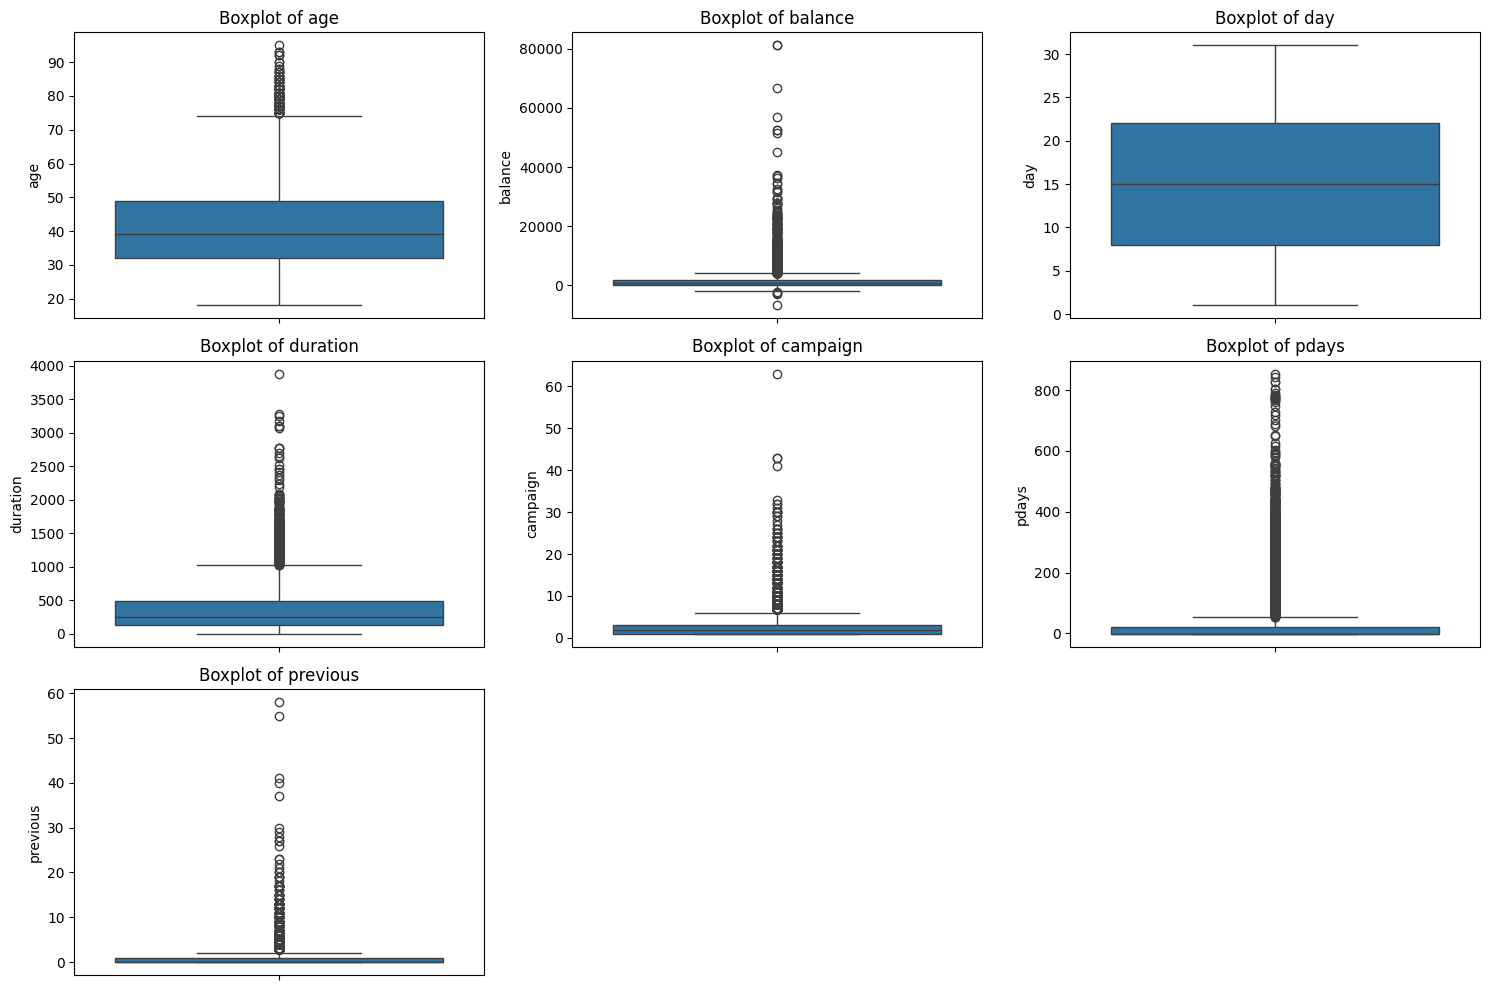

In [7]:
# Lọc ra các cột số để vẽ boxplot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tạo boxplot cho từng cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Chỉnh số hàng và cột dựa vào số cột số
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#### Age

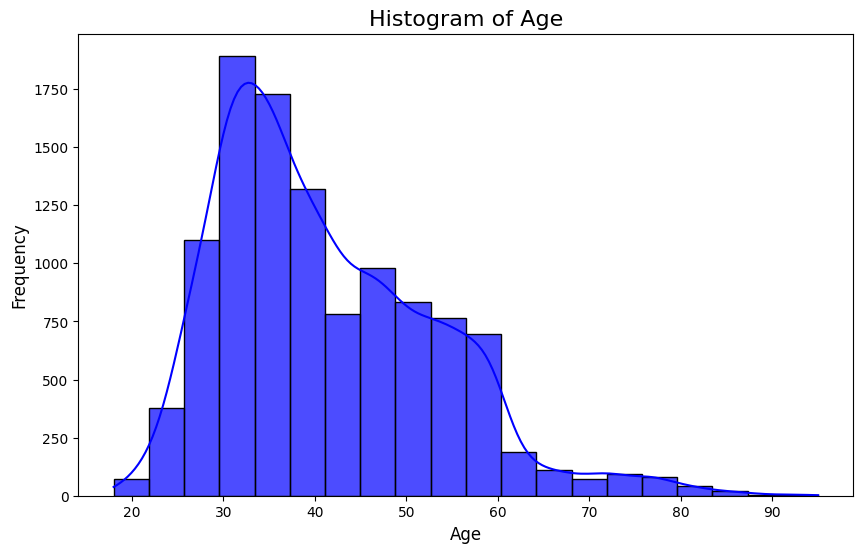

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue', alpha=0.7)

plt.title('Histogram of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.show()


In [53]:
# Xử lý outlier ở age:
ages = df['age']

Q1 = ages.quantile(0.25)
Q3 = ages.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ages[(ages < lower_bound) | (ages > upper_bound)]

print("Outliers in ages:")
print(outliers)
print(upper_bound)
print(lower_bound)

Outliers in ages:
1162     75
1236     85
1243     90
1274     85
1320     83
         ..
10438    77
10562    88
10570    77
10618    78
10843    86
Name: age, Length: 171, dtype: int64
74.5
6.5


Hướng xử lý outliers ở tuổi:
+ Outliers xuất hiện từ tuổi 75 
=> Không loại bỏ mà chúng ta sẽ gộp các khách hàng có tuổi >75 thành 1 nhóm có giá trị tuổi bằng tuổi trung bình của họ 


In [54]:
# Tính giá trị trung bình cho khách hàng có tuổi từ 86 trở lên
mean_age_75_plus = df[df['age'] >= 75]['age'].mean()

print(f"Giá trị trung bình tuổi từ 75 là: {mean_age_75_plus}")


Giá trị trung bình tuổi từ 75 là: 79.69590643274854


In [55]:
# Thay thế các giá trị tuổi từ 75 đến 85 bằng giá trị trung bình

# Thay thế các giá trị tuổi từ 86 trở lên bằng giá trị trung bình
df.loc[df['age'] >= 75, 'age'] = int(mean_age_75_plus)

# Kiểm tra lại dữ liệu
df[df['age'] >= 75]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1162,79,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
1236,79,retired,married,primary,no,12114,no,no,telephone,12,feb,165,2,-1,0,unknown,yes
1243,79,retired,divorced,secondary,no,1,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
1274,79,retired,divorced,primary,no,7613,no,no,cellular,18,feb,355,3,-1,0,unknown,yes
1320,79,retired,divorced,primary,no,1097,no,no,telephone,5,mar,181,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,79,retired,married,primary,no,1492,no,no,telephone,1,sep,663,1,208,2,other,no
10562,79,retired,married,primary,no,648,no,no,telephone,3,sep,318,1,-1,0,unknown,no
10570,79,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
10618,79,retired,married,primary,no,680,no,no,telephone,24,may,838,1,89,9,failure,no


In [56]:
df['age'].value_counts().sort_index()

age
18      8
19     13
20     20
21     30
22     48
23     68
24     95
25    168
26    235
27    246
28    292
29    328
30    456
31    496
32    477
33    464
34    466
35    461
36    432
37    370
38    353
39    343
40    326
41    299
42    295
43    249
44    238
45    253
46    258
47    255
48    214
49    241
50    194
51    194
52    205
53    204
54    187
55    197
56    177
57    184
58    159
59    184
60    169
61     66
62     45
63     38
64     37
65     27
66     29
67     29
68     24
69     20
70     23
71     27
72     28
73     29
74     18
79    171
Name: count, dtype: int64

#### Balance

In [13]:
df['balance'].value_counts().sort_values()

balance
-134        1
 6432       1
 10721      1
 4969       1
 10655      1
         ... 
 4         29
 2         34
 3         35
 1         39
 0        774
Name: count, Length: 3805, dtype: int64

In [57]:

balance = df['balance']

# Tính toán Q1 (25th percentile) và Q3 (75th percentile)
Q1 = balance.quantile(0.25)
Q3 = balance.quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Xác định giới hạn cho outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm outlier
outliers = balance[(balance < lower_bound) | (balance > upper_bound)]

# Hiển thị outlier
print(lower_bound)
print(upper_bound)
outliers

-2257.0
4087.0


9         5090
60        7180
61        5291
69        4580
71       10576
         ...  
11073     6718
11077     6102
11085     4243
11086     6445
11101     6242
Name: balance, Length: 1055, dtype: int64

In [15]:
df[df['balance']> 4087]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes
60,51,blue-collar,married,secondary,no,7180,yes,no,unknown,14,may,927,1,-1,0,unknown,yes
61,41,blue-collar,divorced,secondary,no,5291,yes,no,unknown,14,may,1423,3,-1,0,unknown,yes
69,44,technician,married,tertiary,no,4580,yes,no,unknown,15,may,911,2,-1,0,unknown,yes
71,29,management,married,tertiary,no,10576,no,no,unknown,15,may,1224,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
11077,54,retired,divorced,tertiary,no,6102,yes,yes,unknown,21,may,86,6,-1,0,unknown,no
11085,60,technician,married,primary,no,4243,yes,no,cellular,4,feb,387,1,251,1,failure,no
11086,42,admin.,married,secondary,no,6445,yes,no,unknown,2,jun,20,8,-1,0,unknown,no


In [16]:
df[df['balance']< -2257.0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1525,39,self-employed,married,tertiary,no,-3058,yes,yes,cellular,17,apr,882,3,-1,0,unknown,yes
6388,51,management,divorced,tertiary,no,-2282,yes,yes,cellular,14,jul,301,6,-1,0,unknown,no
6797,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no
10642,52,management,married,tertiary,no,-2712,yes,yes,cellular,2,apr,253,1,-1,0,unknown,no


Ta có thể chia thành 2 nhóm
+ Nhóm outlier 1: > 4087 : có 1051 giá trị => lấy giá trị TB
+ NHóm outlier 2:< -2257 : có 4 giá trị => ít quá => drop

In [58]:
mean_balance_above_40087 = df[df['balance'] > 4087]['balance'].mean()
# Thay thế các giá trị outlier trên upper bound bằng giá trị trung bình của nhóm outlier
df.loc[df['balance'] > upper_bound, 'balance'] = int(mean_balance_above_40087)
# Hiển thị kết quả
df['balance'].value_counts()
print(mean_balance_above_40087)

8459.527117031399


In [59]:
mean_balance_lower = df[df['balance'] < -2257 ]['balance'].mean()
# Thay thế các giá trị outlier trên upper bound bằng giá trị trung bình của nhóm outlier
df.loc[df['balance'] < lower_bound, 'balance'] = int(mean_balance_lower)
# Hiển thị kết quả
df['balance'].value_counts()
print(mean_balance_lower)

-3724.75


#### Duration

In [60]:

duration = df['duration']

# Tính toán Q1 (25th percentile) và Q3 (75th percentile)
Q1 = duration.quantile(0.25)
Q3 = duration.quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Xác định giới hạn cho outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm outlier
outliers = duration[(duration < lower_bound) | (duration > upper_bound)]

# Hiển thị outlier
print("Outliers inbalance:")
print(outliers)
print(lower_bound)
print(upper_bound)

Outliers inbalance:
0        1042
1        1467
2        1389
6        1201
9        1297
         ... 
10647    1504
10788    1090
10798    1152
10802    1244
11008    1812
Name: duration, Length: 636, dtype: int64
-399.0
1033.0


In [20]:
df[df['duration'] > 1033]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
9,28,services,single,secondary,no,8459,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,31,technician,single,secondary,no,433,no,no,cellular,11,aug,1504,2,-1,0,unknown,no
10788,41,blue-collar,married,secondary,no,8459,yes,no,cellular,3,apr,1090,1,-1,0,unknown,no
10798,67,technician,married,secondary,no,0,no,no,cellular,13,aug,1152,2,188,1,success,no
10802,58,management,divorced,tertiary,no,577,no,no,unknown,15,may,1244,3,-1,0,unknown,no


In [21]:
df[df['duration'] < -399]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [61]:
Q1_duration = df['duration'].quantile(0.25)
Q3_duration = df['duration'].quantile(0.75)

IQR_duration = Q3_duration - Q1_duration

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

print(f"Ngưỡng dưới cho duration: {lower_bound_duration}")
print(f"Ngưỡng trên cho duration: {upper_bound_duration}")

# Tìm các giá trị outlier trên upper bound
outliers_upper_duration = df[df['duration'] > upper_bound_duration]

# Tính giá trị trung bình của nhóm outlier
mean_outlier_upper_duration = outliers_upper_duration['duration'].mean()

# Thay thế các giá trị outlier trên upper bound bằng giá trị trung bình của nhóm outlier
df.loc[df['duration'] > upper_bound_duration, 'duration'] = int(mean_outlier_upper_duration)

# Xóa các hàng có duration dưới lower bound
df = df[df['duration'] >= lower_bound_duration]

# Hiển thị kết quả
print(mean_outlier_upper_duration)
df

Ngưỡng dưới cho duration: -399.0
Ngưỡng trên cho duration: 1033.0
1367.251572327044


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1367,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1367,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1367,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#### Campaign

In [62]:
Q1_campaign = df['campaign'].quantile(0.25)
Q3_campaign = df['campaign'].quantile(0.75)

# Tính IQR
IQR_campaign = Q3_campaign - Q1_campaign

# Xác định ngưỡng dưới và ngưỡng trên
lower_bound_campaign = Q1_campaign - 1.5 * IQR_campaign
upper_bound_campaign = Q3_campaign + 1.5 * IQR_campaign
print(upper_bound_campaign)
print(lower_bound_campaign)


6.0
-2.0


In [24]:
dfc = df[df['campaign']> 20]
dfc['campaign'].value_counts()

campaign
21    8
24    5
22    4
30    4
25    3
26    3
23    3
29    2
32    2
43    2
41    1
63    1
27    1
28    1
33    1
31    1
Name: count, dtype: int64

In [63]:
# Step 1: Tính giá trị trung bình cho campaign > 27
mean_27 = df[df['campaign'] > 27]['campaign'].mean()

print(f"Giá trị trung bình cho campaign từ 27: {mean_27}")

# Step 2: Gán giá trị trung bình vào các hàng có campaign > 27
df.loc[df['campaign'] > 27, 'campaign'] = mean_27

# Step 3 (Tùy chọn): Nếu muốn làm tròn giá trị trung bình về số nguyên
df['campaign'] = df['campaign'].round().astype(int)

# Kiểm tra kết quả
print(df['campaign'])


Giá trị trung bình cho campaign từ 27: 34.93333333333333
0        1
1        1
2        1
3        1
4        2
        ..
11157    1
11158    4
11159    2
11160    2
11161    1
Name: campaign, Length: 11162, dtype: int32


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_68868\3888818777.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34.93333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['campaign'] > 27, 'campaign'] = mean_27


In [64]:
df.to_csv('bank_project.csv', index=False)

#### Phân tích thống kế mô tả

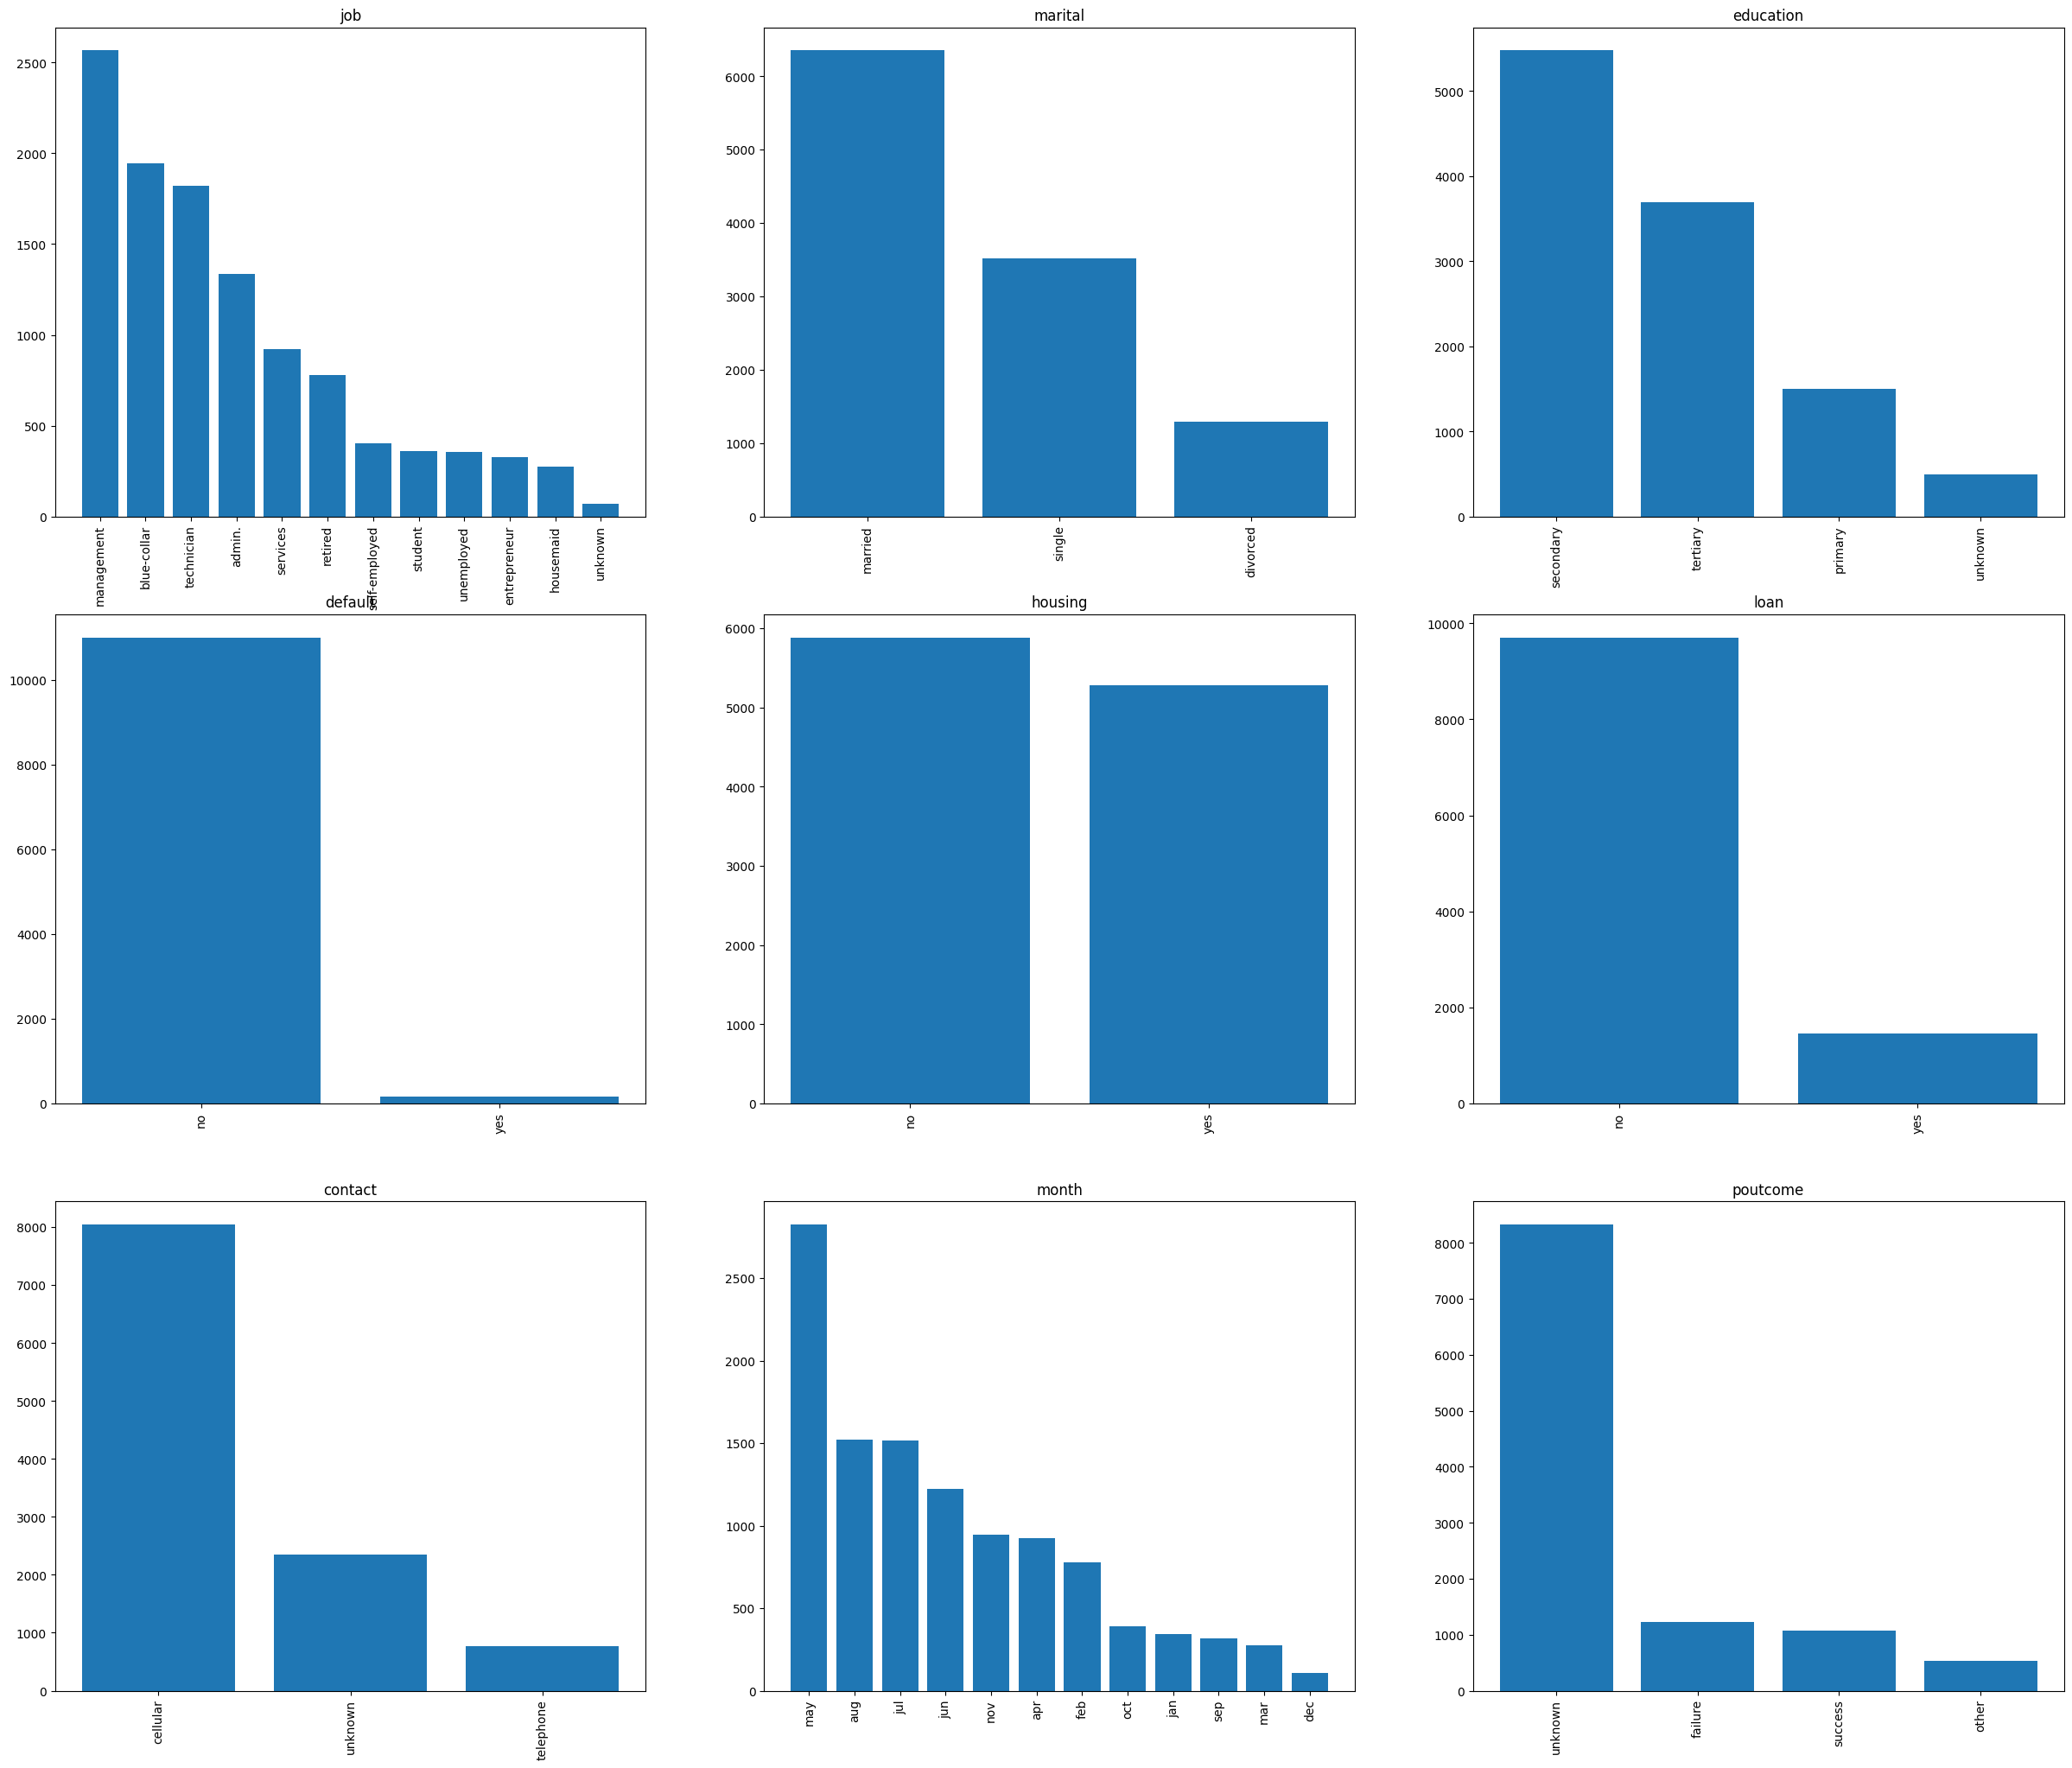

In [26]:
import numpy as np
# Categorical number
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(30, 25))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Insight:
+ Management và Blue-collar Job type Clients được nhận đến nhiều cuộc gọi nhất
+ Số khách hàng Married và Single chiếm tỷ lệ nhiều hơn so với divorced
+ Hầu hết education của customers đều là trung cấp, đại học và sau đại học, số lượng khách hàng trình độ học vấn cơ bản rất ít
+ Hầu hết tất cả khách hàng không có nợ quá hạn trong tín dụng
+ Khách hàng có khoản vay mua nhà và không có khoản vay mua nhà tương đương nhau
+ 86.7% khách hàng không có khoản vay cá nhân
+ Hầu hết các khách hàng đều được liên hệ thông qua máy bàn 
+ Hầu hết các khách hàng trong ngân hàng được liên hệ vào các tháng 5, 7 và 8.
rất ít khách hàng được liên hệ vào các tháng 9, 3 và 12
+ Từ Phân tích, Chiến dịch tiếp thị trước đó sẽ có nhiều Thất bại hơn Thành công hầu như là unknown

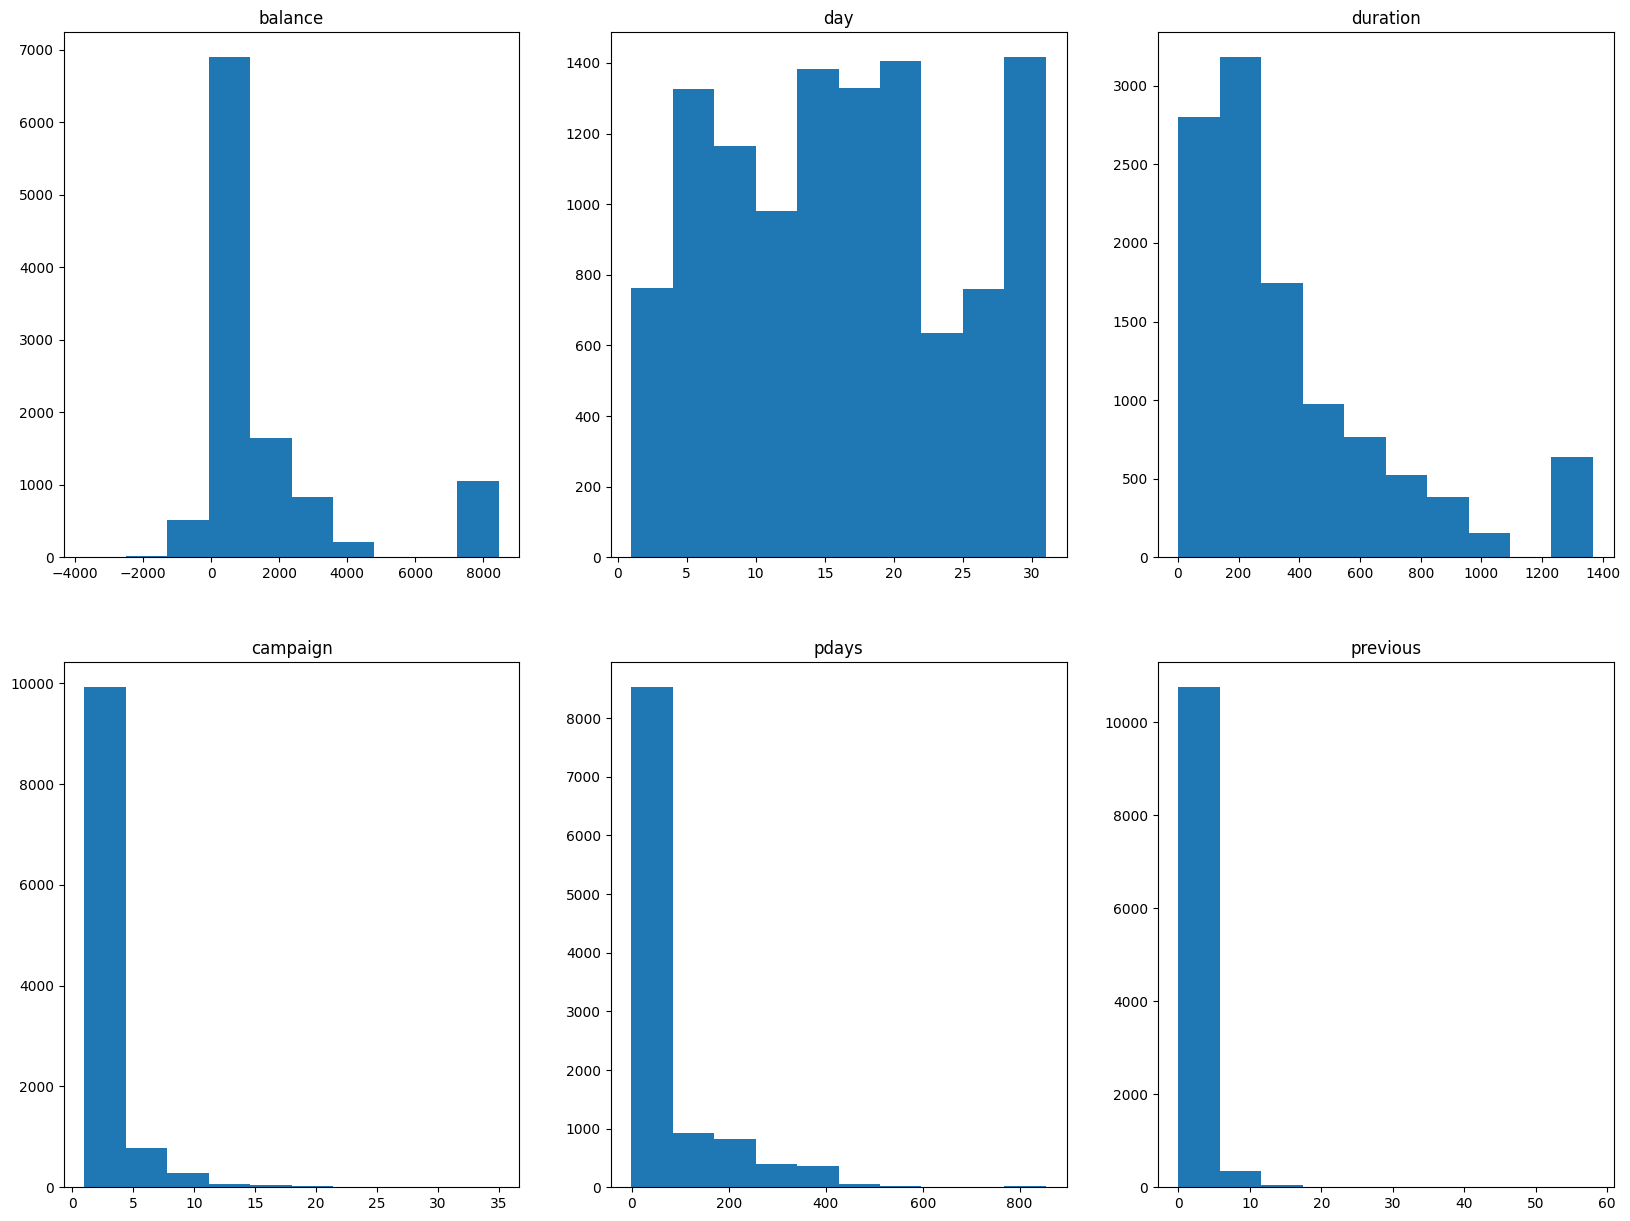

In [27]:
# Numeric
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

+ Số dư trung bình hàng năm của khách hàng chủ yếu là 0
+ Ngày liên hệ cuối cùng trong tháng chủ yếu là 14-23: ngày giữa tháng
+ Thời gian của lần liên hệ cuối cùng chủ yếu từ 0 - 500 giấy
+ Số lần liên hệ cho khách hàng trong chiến dịch này thuộc khoảng 0 - 8
+ Số ngày kể từ lần cuối mà liên hệ cho khách hàng ( chiến dịch trước đó): đa số là 0 - 60 ngày
+ Ngân hàng đã thực hiện tầm 0 - 8 liên hệ cho khách hàng ở chiến dịch trước

Ta có thể thấp cái giá trị ở cột pday, previous,poutcome tồn tại nhiều outliers => Check

In [28]:
df[['pdays', 'campaign', 'previous']].describe()


,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508511,0.832557
std,108.758282,2.703217,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,35.000000,58.000000


In [29]:
#pdays
len(df[df['pdays'] >  400 ]) /len(df) * 100

1.2005017022039062

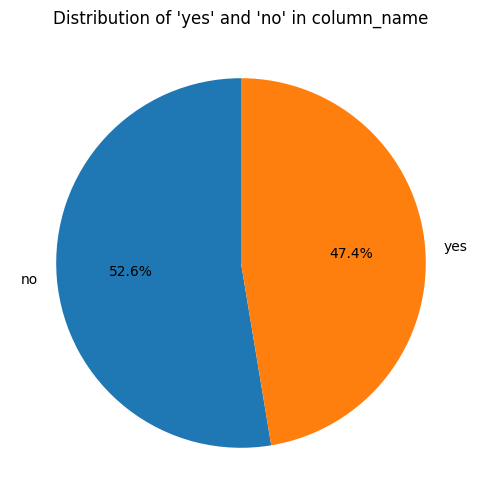

In [30]:
value_counts = df['deposit'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of 'yes' and 'no' in column_name")
plt.show()

+ dường như kết quả của chiến dịch mới này vẫn không khả quan hơn khi tỷ lệ khách hàng từ chối vẫn nhiều hơn khách hàng đồng ý
+ nhưng mà hai tỷ lệ này không chênh lệch quá lớn

# EDA

### Phân tích đơn biến

#### Categorical Number

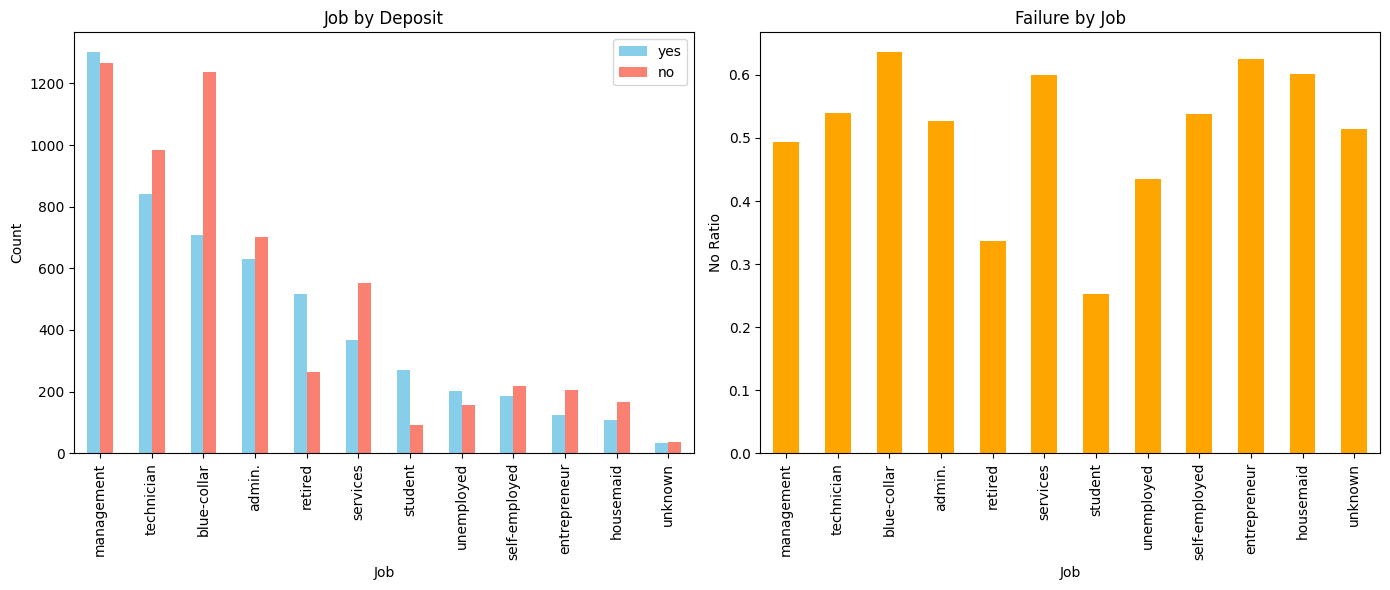

In [49]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Job by Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Job')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Failure by Job', color='orange')
axes[1].set_xlabel('Job')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Các khách hàng : blue-collar, entrepreneur, services, housemaid có tỷ lệ từ chối cao hơn nhiều so với các nhóm còn lại
+ Student và retired là 2 nhóm có tỷ lệ đăng kí term-deposit cao hơn những nhóm còn lại
+ Số lượng khashc hàng là management và techinician đăng kí gửi tiền nhiều nhất

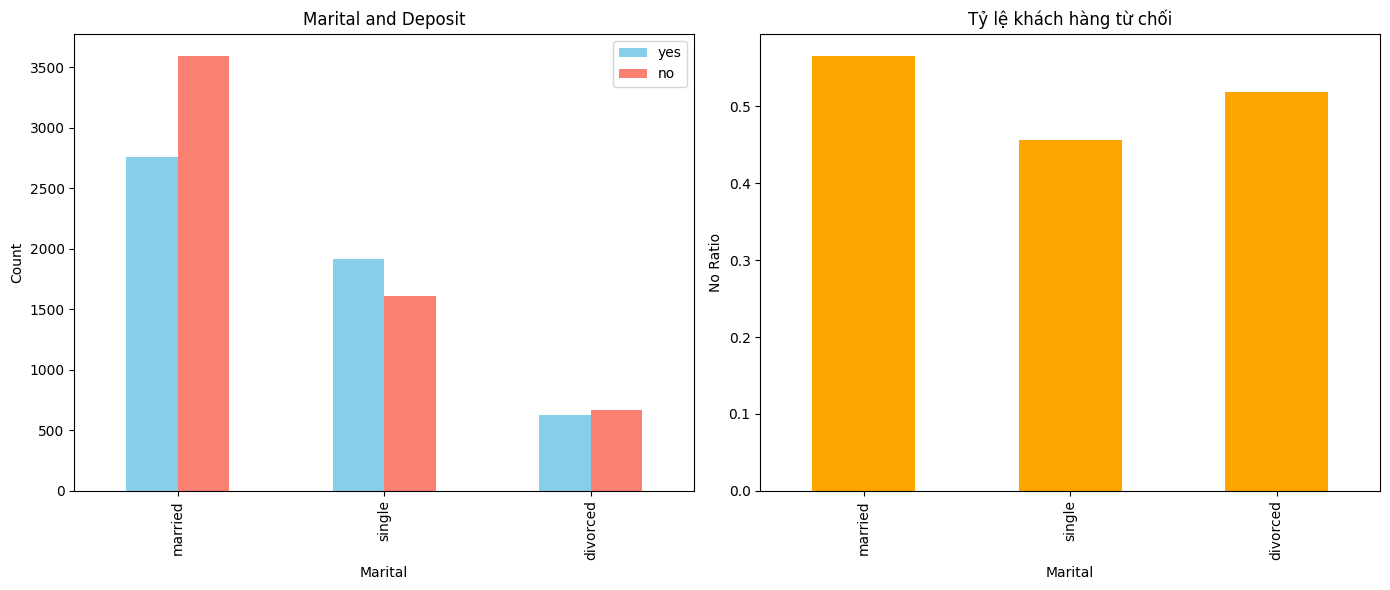

In [32]:
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Marital and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Marital')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Marital')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Mặc dù về mặt tuyệt đối, người tiêu dùng đã kết hôn thường đồng ý sử dụng dịch vụ nhiều hơn, nhưng về mặt tương đối, người độc thân phản hồi tốt hơn.

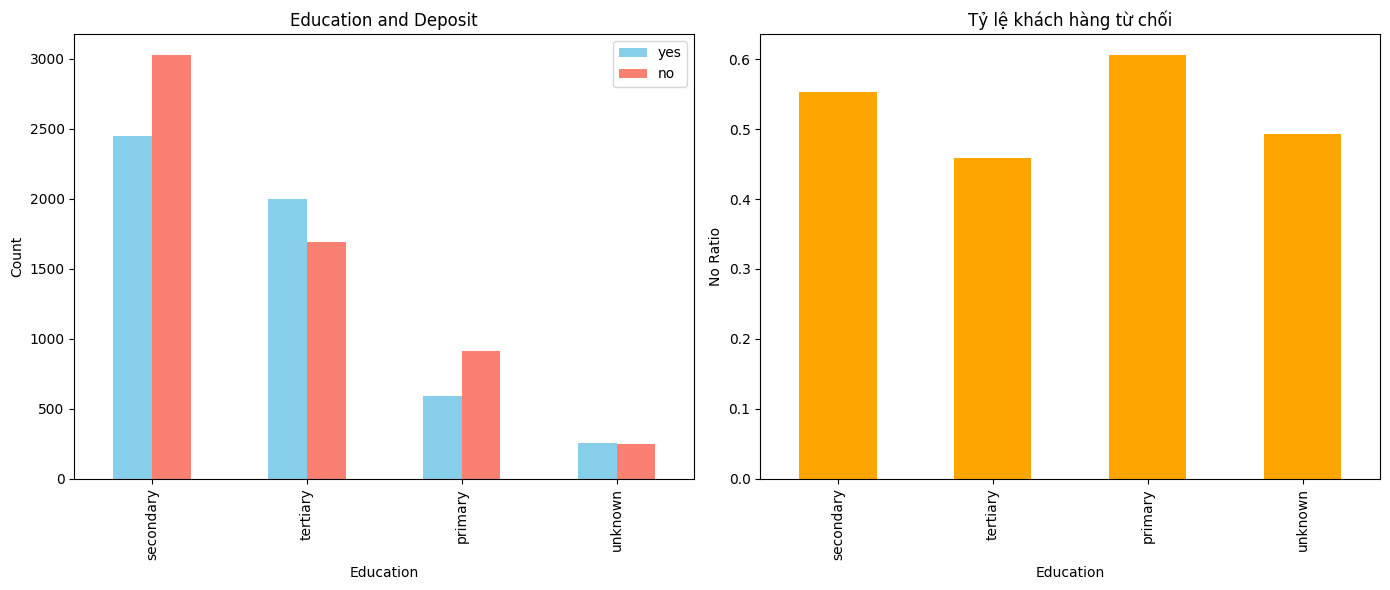

In [33]:
### Education
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Education and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Tỷ lệ khách hàng từ chối  ở primary cao nhất 

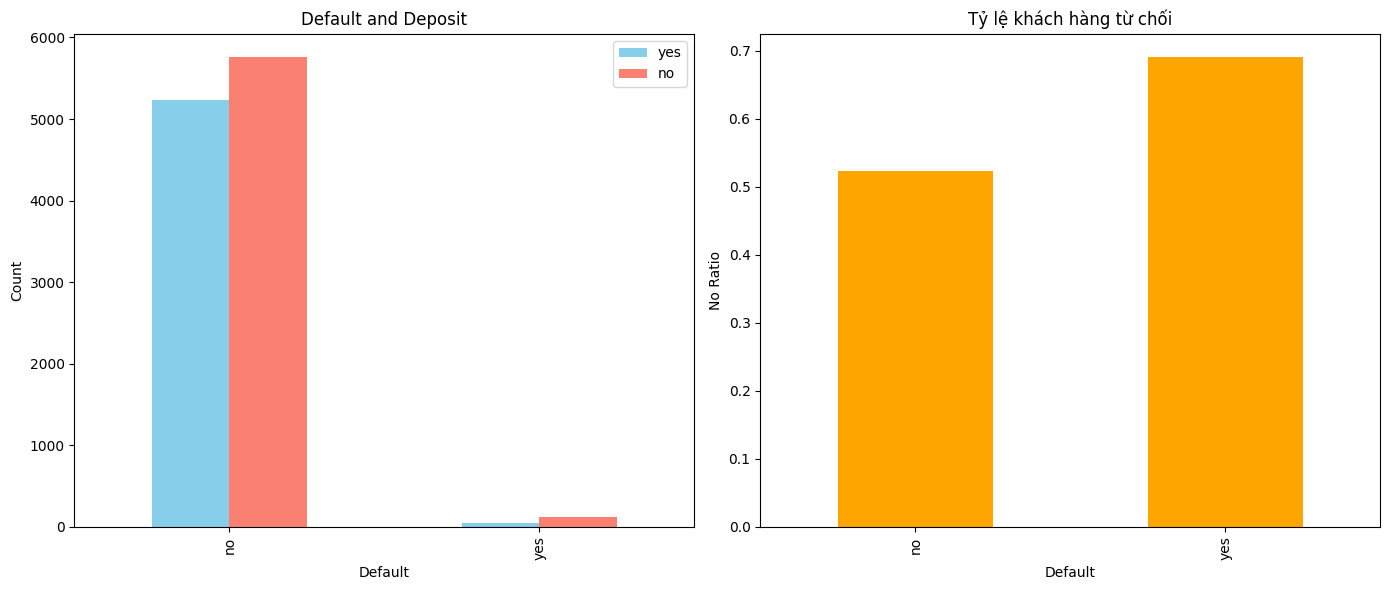

In [34]:
### Education
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['default'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['default'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Default and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Khách hàng có nợ tín dụng quá hạn thì có xu hướng từ chối gửi term deposit

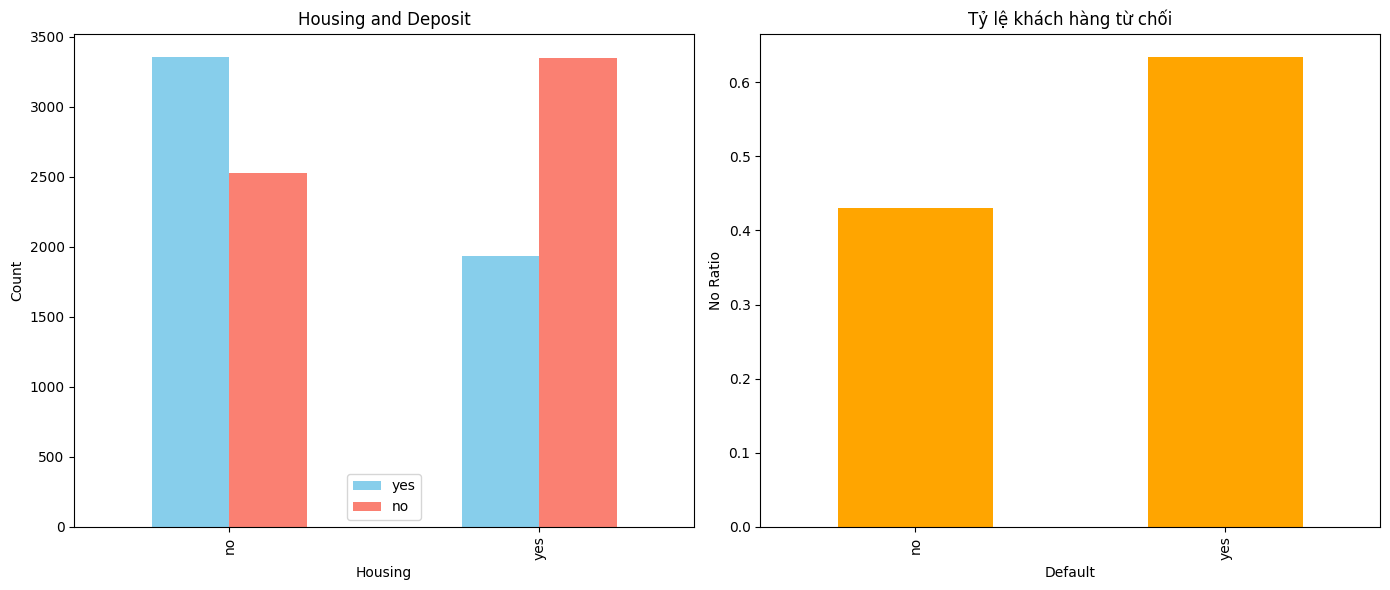

In [35]:
## housing & deposit
### Education
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['housing'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['housing'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Housing and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Housing')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Những người có sở hữu nhà có xu hướng từ chối nhiều hơn

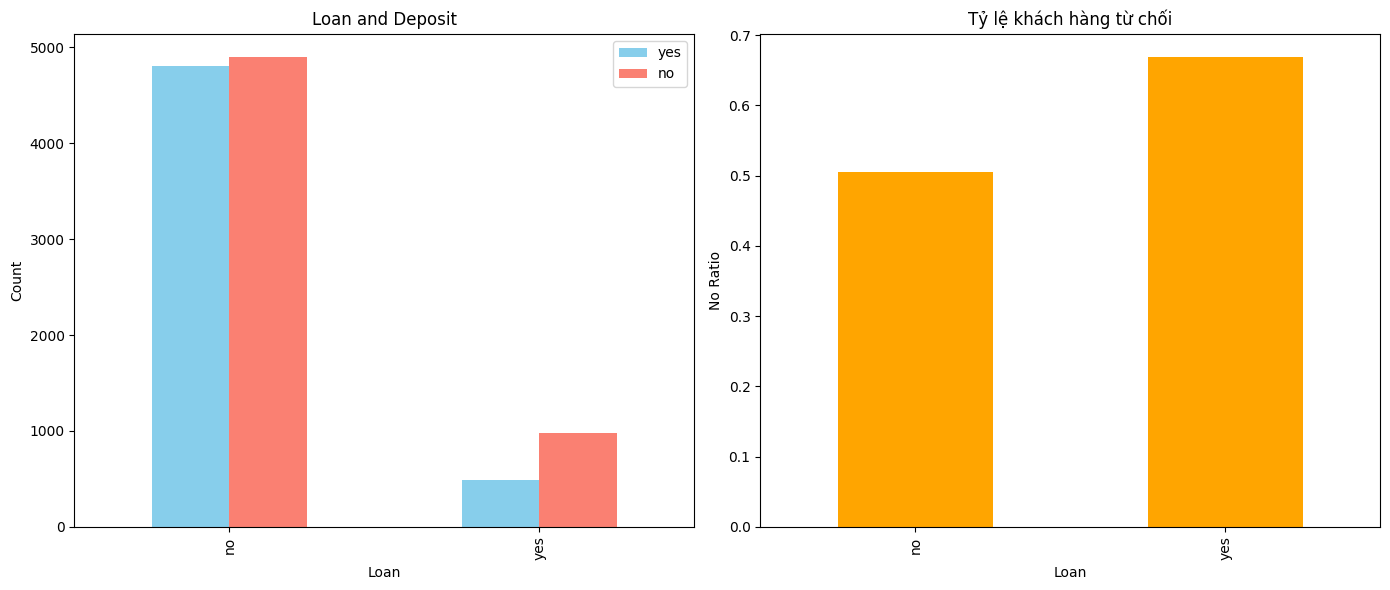

In [36]:
# Loan Distribution

j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['loan'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['loan'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Loan and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Loan')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Loan')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


Sự khác biệt rõ ràng giữa những người tiêu dùng đã sử dụng dịch vụ của ngân hàng và đã nhận được khoản vay.
Có khoản vay => từ chối

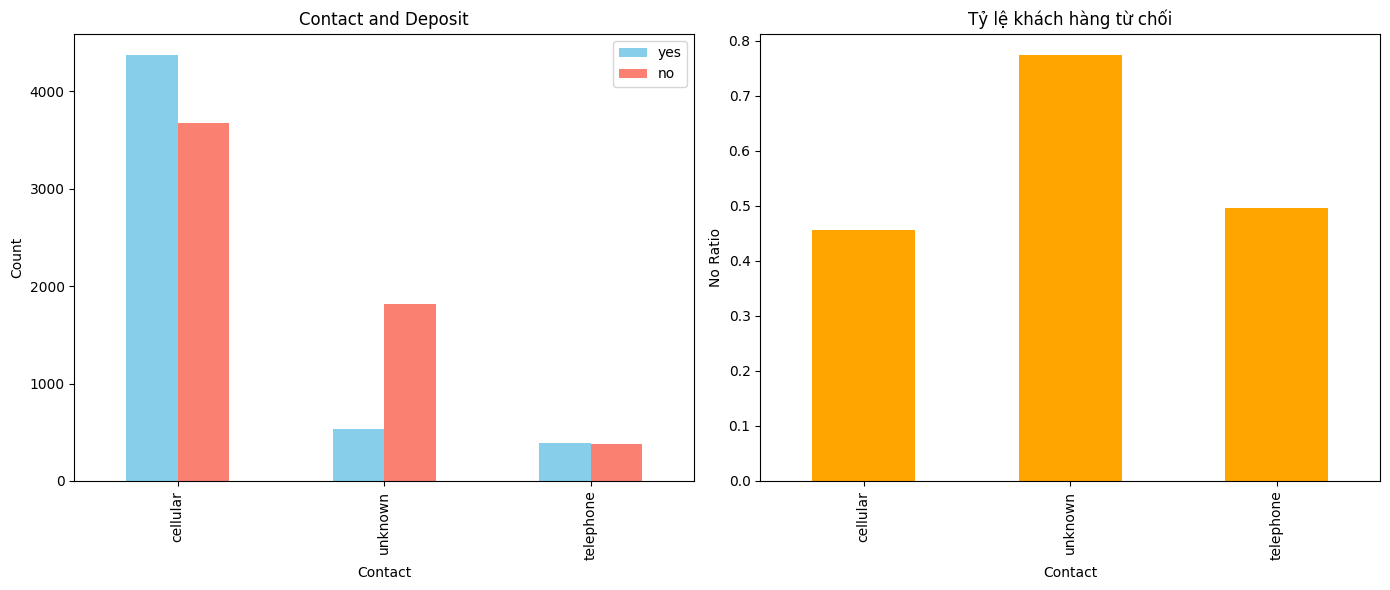

In [37]:

j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Contact and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Contact')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Contact')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Nhìn chung có thể thấy tỷ lệ KH đồng ý và không đồng ý không quá chệnh lệch nhau, cellular có thấp hơn telephone 1 ít

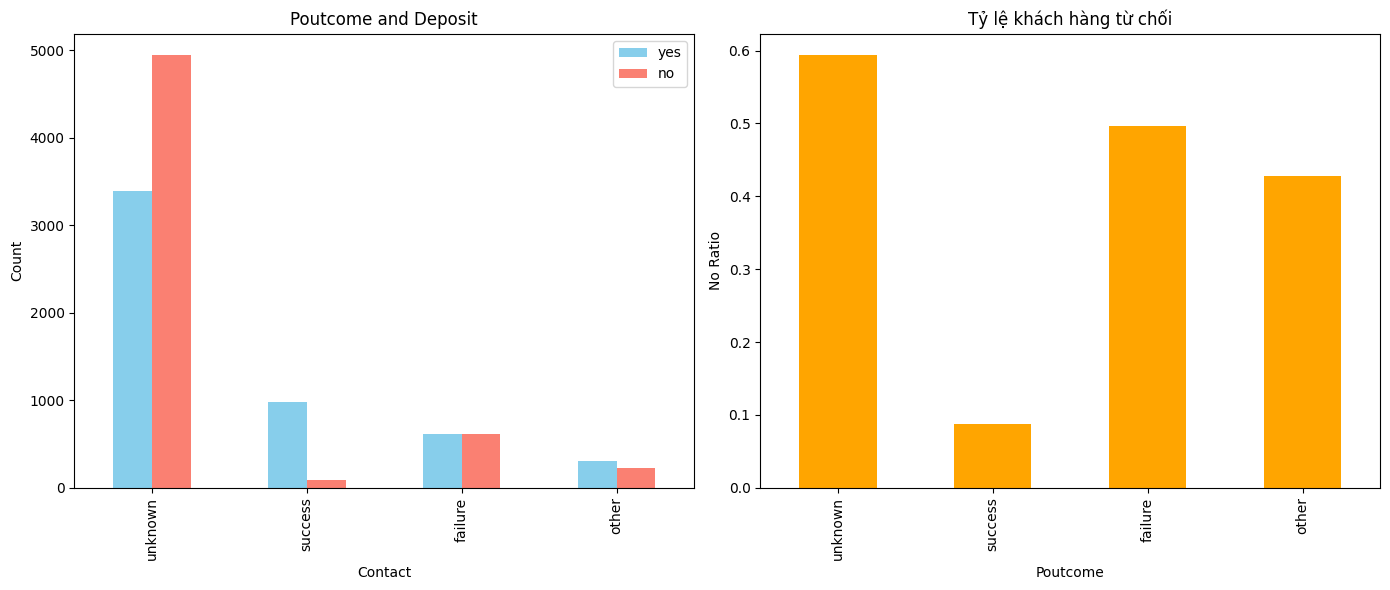

In [38]:

j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['poutcome'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['poutcome'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Poutcome and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Contact')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Poutcome')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Có vẻ như kết quả của chiến dịch trước có ảnh hưởng tới kết quả lần nãy. Khách hàng đã đồng ý ở lần trước có xu hướng đồng ý ở lần tiếp theo
+ Và công ty cũng chưa đưa ra những chiến dịch mới để tiếp cận, thuyết phục được những khách hàng chưa đồng ý

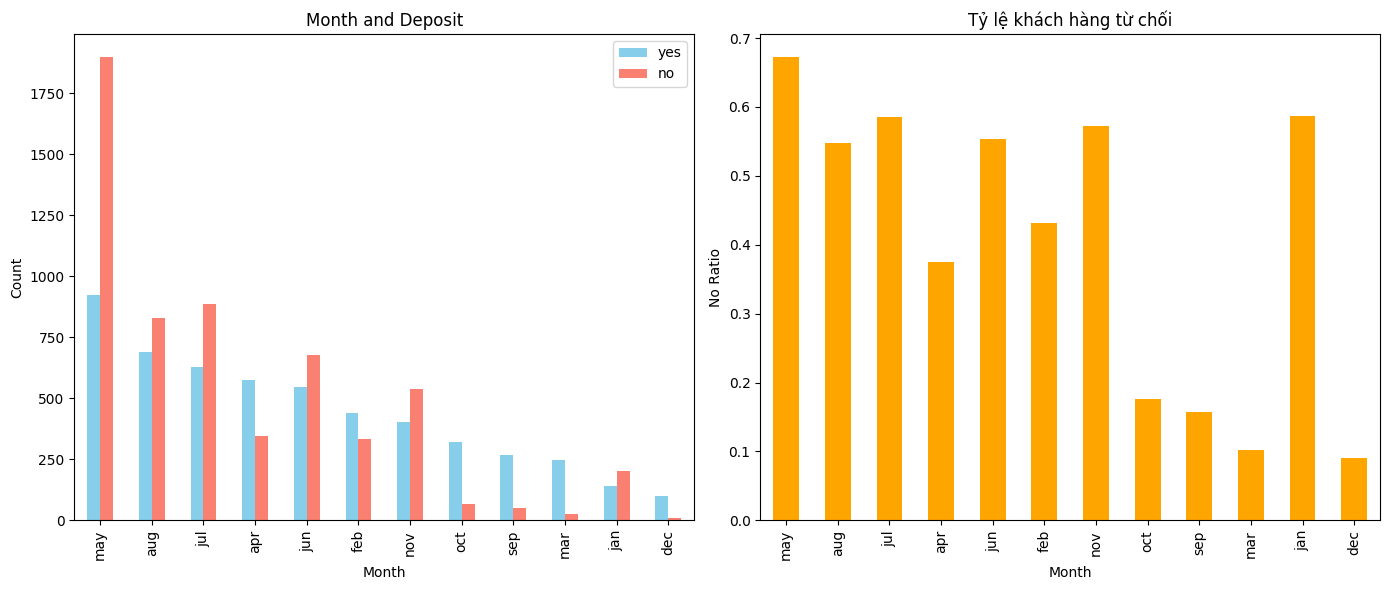

In [39]:
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['month'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['month'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Month and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


Hầu hết khách hàng được liên hệ vào mùa hè (tháng 5-tháng 7)
Tháng 11 và tháng 10 khá yên tĩnh cho đến tháng 11 khi nó đạt đỉnh trở lại trước Giáng sinh và tháng 1-tháng 2, không có bất kỳ quan sát nào.
+ Vào tháng 5 khách hàng từ chối rất cao có lên đến gần 0.7%
+ Tháng 12 sẽ có lượng khách hàng rời bỏ ít nhât

rất ít khách hàng được liên hệ vào các tháng 9, 3 và 12. Thậm chí ít liên hệ được thực hiện vào những tháng này, nhiều khách hàng đăng ký gửi tiền có kỳ hạn hơn vào những tháng này. Tốt hơn là nên liên hệ với khách hàng nhiều hơn vào những tháng này.

#### Numerical

In [40]:
df['deposit'].value_counts()
df[df['deposit'] == 32]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [41]:
# Mã hóa cột deposit: 'y' thành 1 và 'no' thành 0
df['label'] = df['deposit'].map({'yes': 1, 'no': 0})


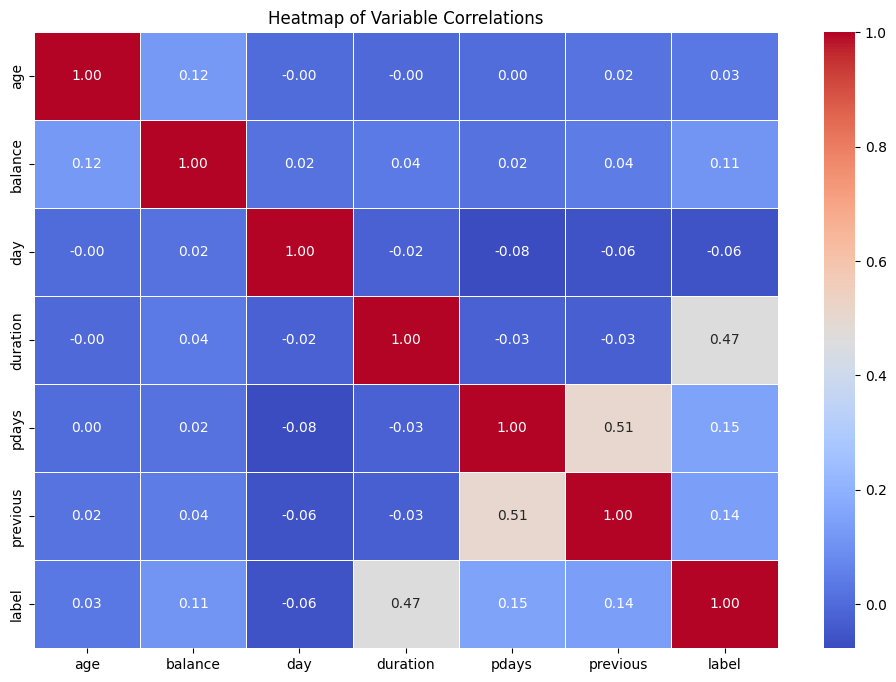

In [42]:
### Correlation


# Chỉ chọn các cột dạng số để tính toán ma trận tương quan
numeric_df = df.select_dtypes(include=['int64'])

# Tính toán ma trận tương quan trên dữ liệu số
correlation_matrix = numeric_df.corr()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ heatmap của ma trận tương quan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Thêm tiêu đề
plt.title('Heatmap of Variable Correlations')
plt.show()



Cột day, balance,age có vẻ có corr ít nhất với deposit
Cột duration có mối tương quan cao nhất

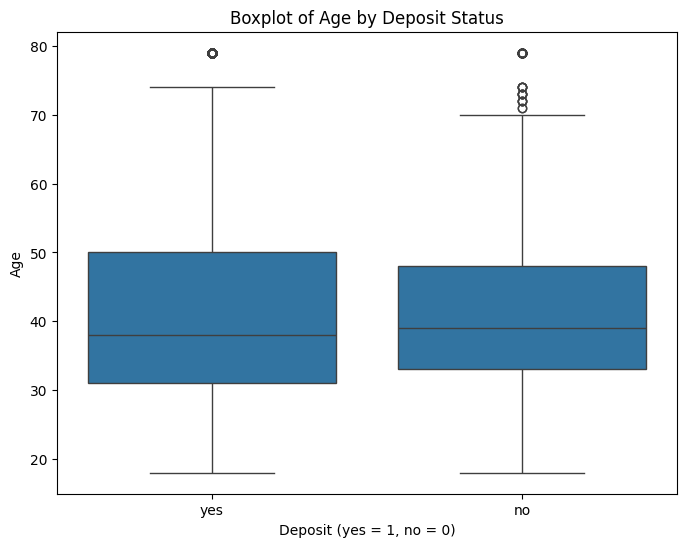

In [43]:
# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='age', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Age by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Age')
plt.show()


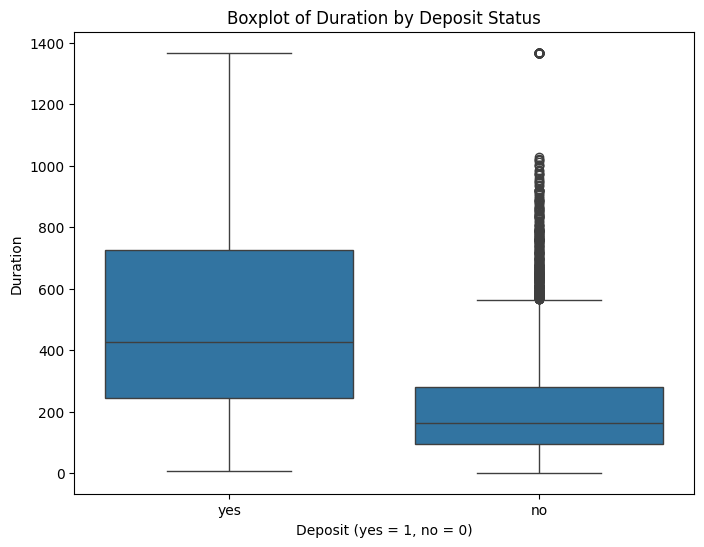

In [44]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='duration', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Duration by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Duration')
plt.show()


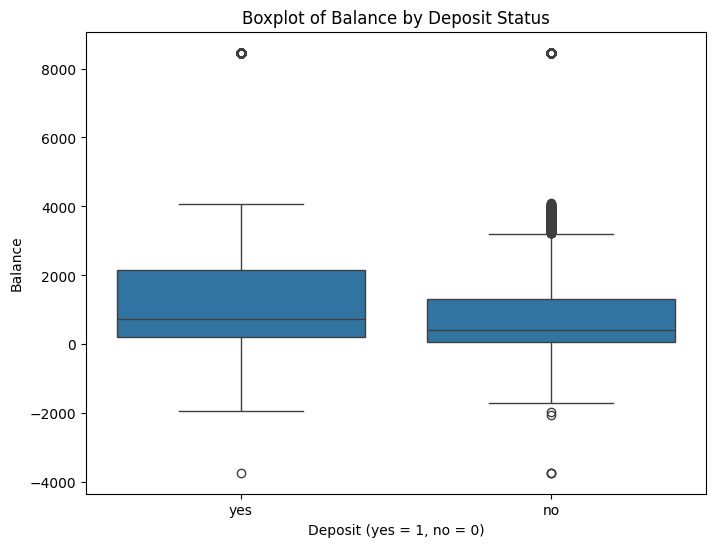

In [45]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='balance', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Balance by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Balance')
plt.show()


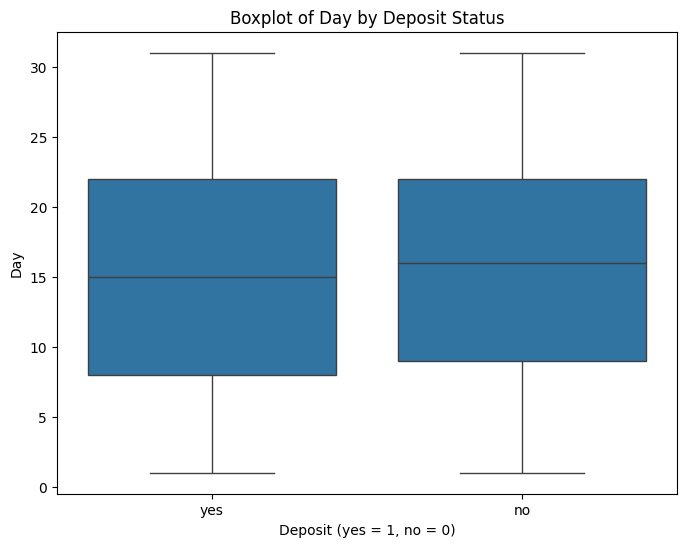

In [46]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='day', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Day by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Day')
plt.show()


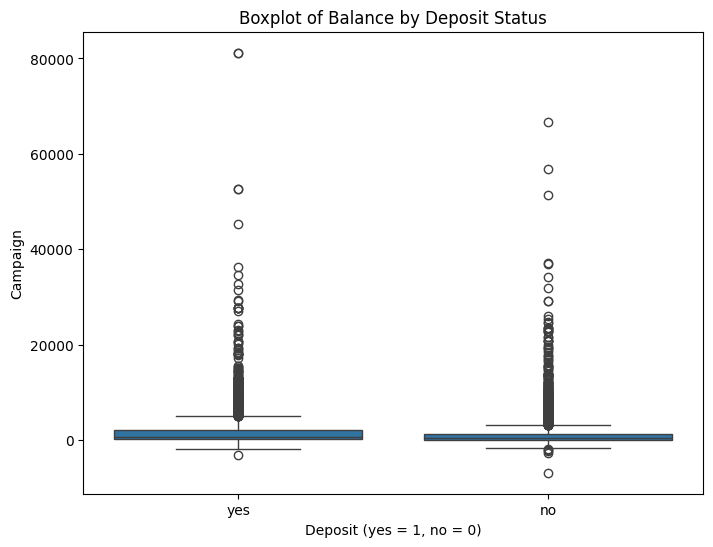

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='balance', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Balance by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Campaign')
plt.show()


In [23]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


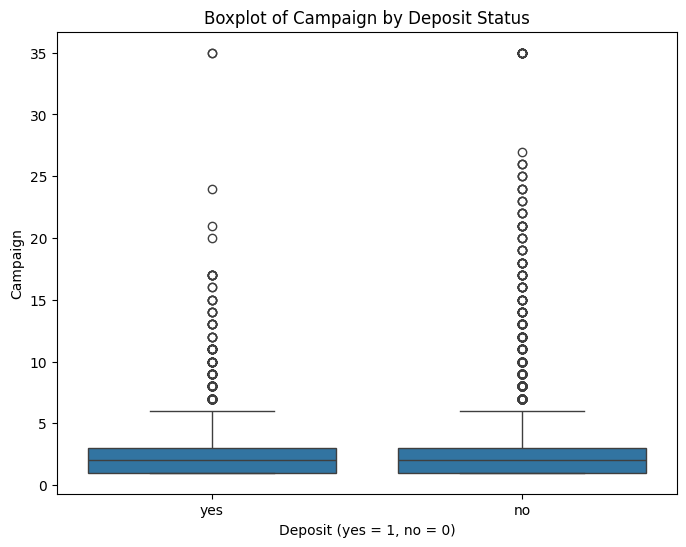

In [47]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='campaign', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Campaign by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Campaign')
plt.show()


In [48]:
 với sự gia tăng số lượng liên hệ được thực hiện cho khách hàng trong chiến dịch, khách hàng sẽ có nhiều cơ hội hủy đăng ký gửi tiền có kỳ hạn hơn. Tốt hơn là nên thực hiện ít liên hệ hơn với khách hàng để khiến họ đăng ký gửi tiền có kỳ hạn

SyntaxError: invalid syntax (676439721.py, line 1)

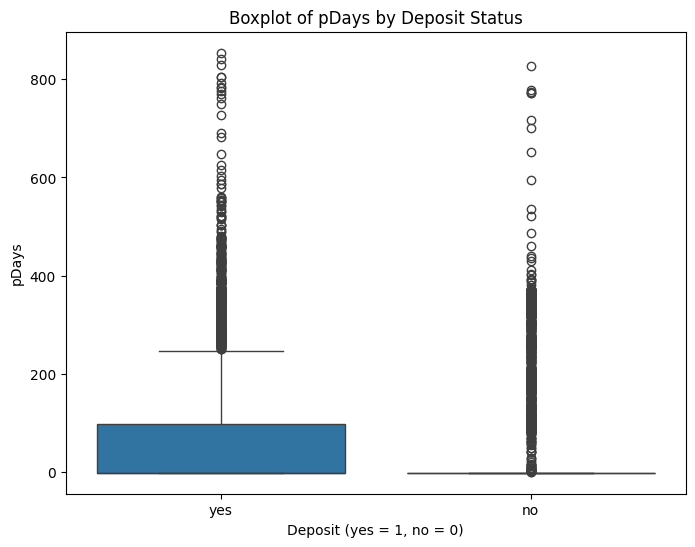

In [ ]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='pdays', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of pDays by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('pDays')
plt.show()


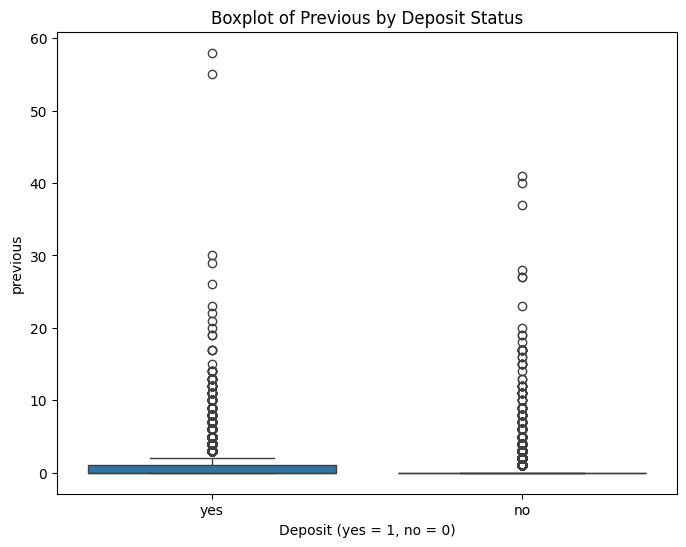

In [ ]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='previous', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Previous by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('previous')
plt.show()


+ Tạm thời có thể phân loại thành 2 nhóm
     + Feature có ảnh hưởng đến Target: previous (số lần liên hệ cho khách hàng trước chiến dịch này), pdays(số ngày kể từ lần cuối khách hàng được liên hệ từ 1 chiến dịch trước đó), duration(thời gian của lần liên hệ cuối cùng)
     + Feature không gây ảnh hưởng nhiều đến target: campaign(số lần liên hệ cho khách hàng cho chiến dịch này), day(ngày liên hệ cuối cùng trong tháng), age( tuổi),balance( số dư trung bình hàng năm)

### Dates

## Phân tích Đa biến kết hợp

##### According to Occupation (Job)

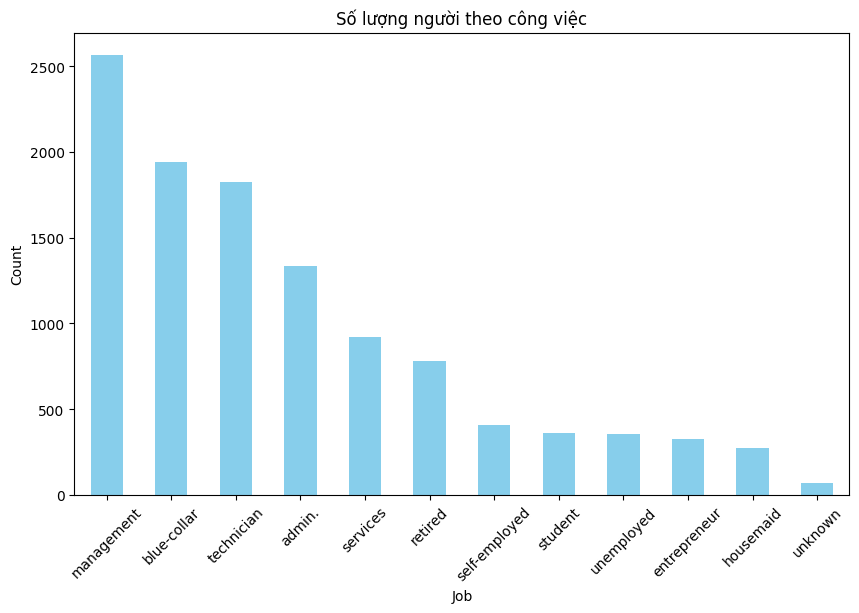

In [ ]:
import matplotlib.pyplot as plt

job_counts = df['job'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')

plt.title('Số lượng người theo công việc')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Xoay nhãn để dễ đọc hơn
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\1777345115.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




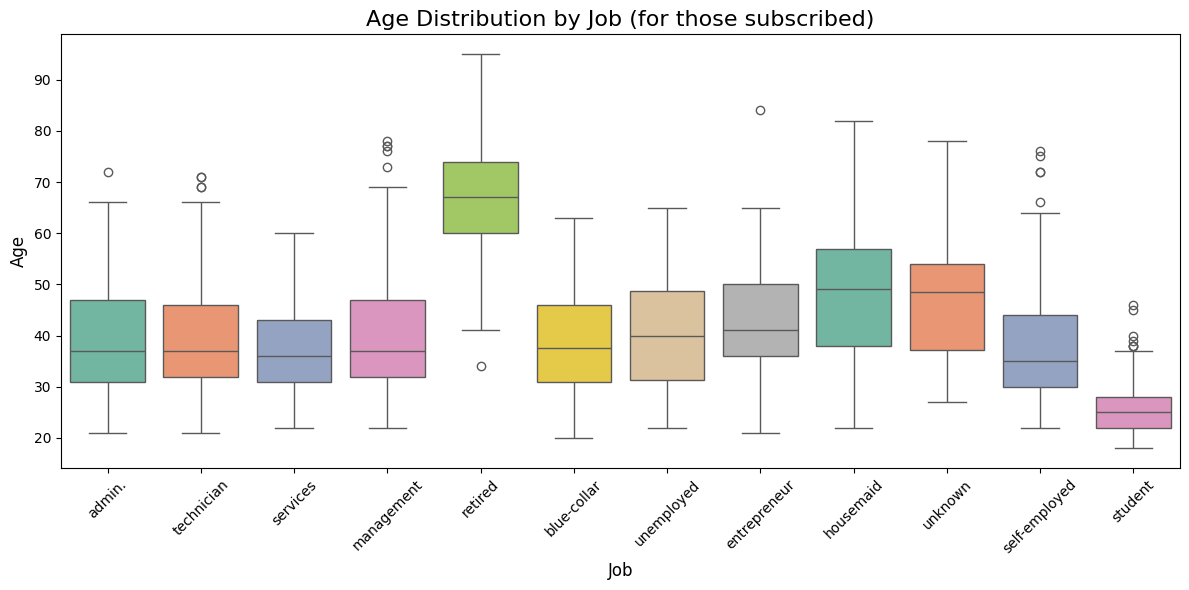

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu của bạn
suscribed_df = df.loc[df["deposit"] == "yes"]  # Chỉ lọc những người đã đăng ký

# Vẽ biểu đồ phân phối
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='age', data=suscribed_df, palette="Set2")

# Tùy chỉnh biểu đồ
plt.title('Age Distribution by Job (for those subscribed)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Những người đã nghỉ hưu là những người có độ tuổi trung bình cao nhất trong khi sinh viên là những người có độ tuổi trung bình thấp nhất.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\1388566811.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




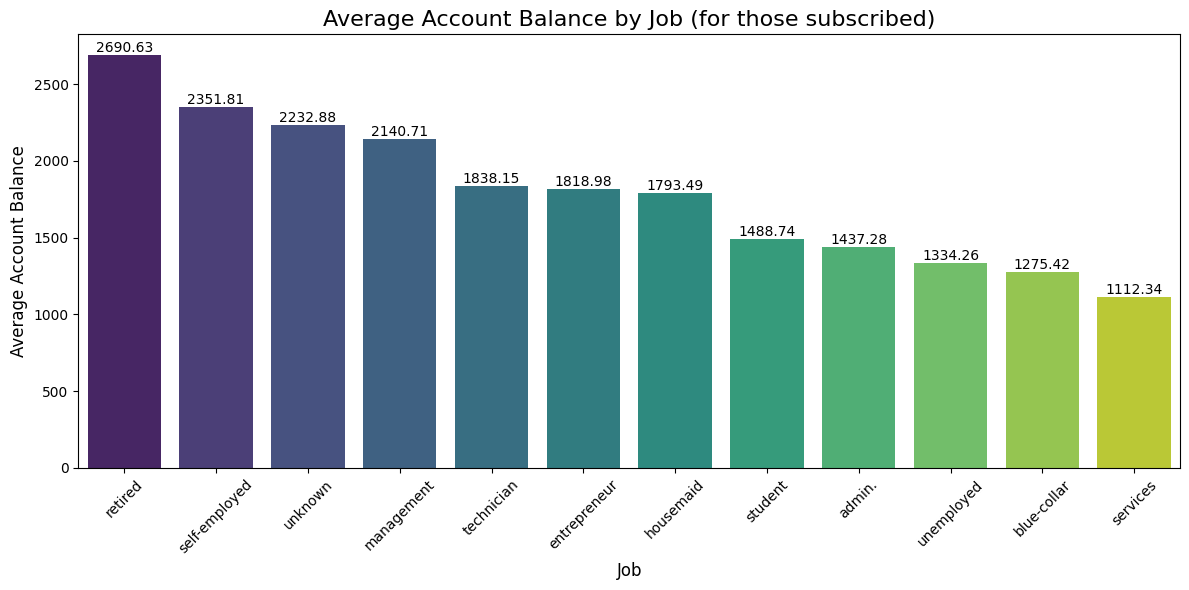

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu của bạn
suscribed_df = df.loc[df["deposit"] == "yes"]  # Chỉ lọc những người đã đăng ký

# Tính toán số dư tài khoản trung bình theo nghề nghiệp và sắp xếp từ lớn đến bé
avg_balance_by_job = suscribed_df.groupby('job')['balance'].mean().reset_index()
avg_balance_by_job = avg_balance_by_job.sort_values(by='balance', ascending=False)  # Sắp xếp theo balance từ lớn đến bé

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='job', y='balance', data=avg_balance_by_job, palette="viridis")

# Thêm số vào trên cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format số với 2 chữ số sau dấu phẩy
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí số
                ha='center', va='center',  # Căn giữa
                fontsize=10, color='black',  # Cài đặt font chữ
                xytext=(0, 5), textcoords='offset points')  # Điều chỉnh vị trí của số

# Tùy chỉnh biểu đồ
plt.title('Average Account Balance by Job (for those subscribed)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Average Account Balance', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


+  retired, self_employed, management là những đối tượng có số dư tài khoản cao hơn so với clai

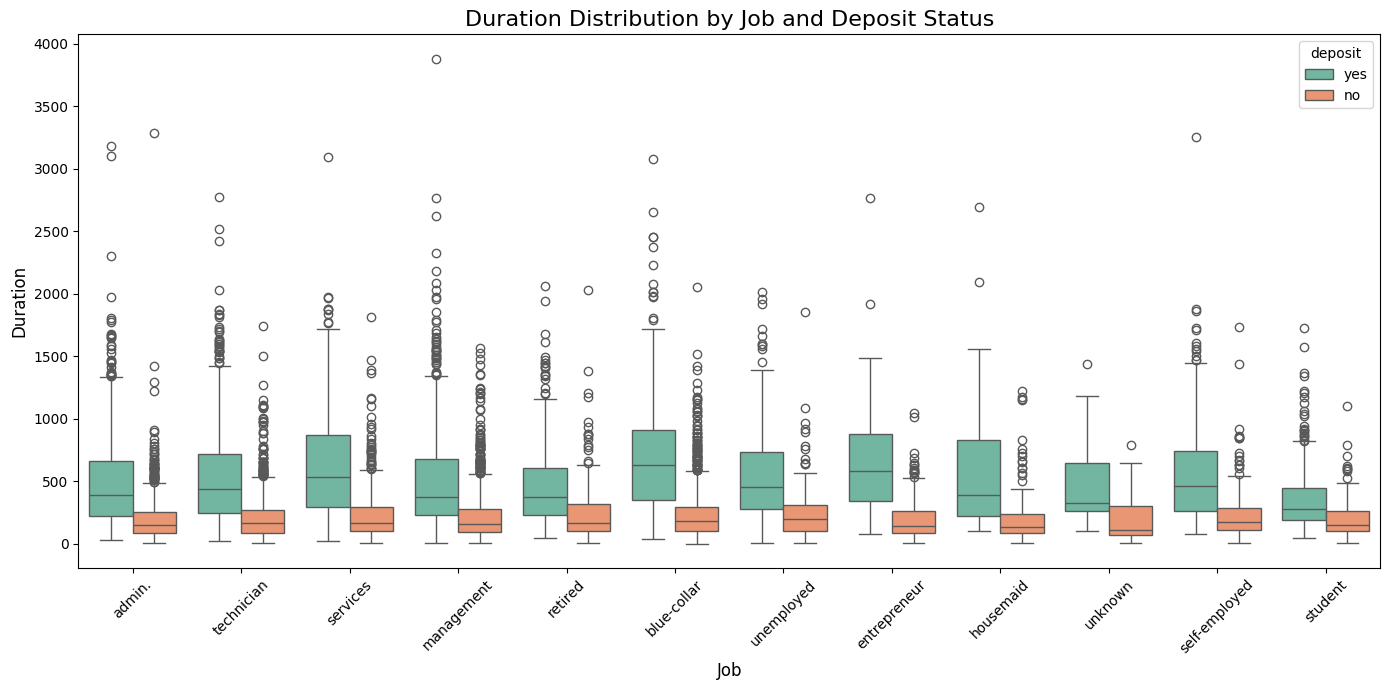

In [ ]:
## Duration vs Job
# Chia dữ liệu theo giá trị cột deposit (yes, no) và job
plt.figure(figsize=(14, 7))
sns.boxplot(x='job', y='duration', hue='deposit', data=df, palette="Set2")

# Thêm tiêu đề và các nhãn
plt.title('Duration Distribution by Job and Deposit Status', fontsize=16)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Nhìn chung, thời gian cuộc gọi lần liên hệ cuối cùng càng lâu thì tỷ lệ khách hàng say yes càng cao, nói cách khác là những khách hàng tiềm năng sẽ có thời lượng cuộc gọi lâu hơn
+ So sánh mức trung bình thì, nhóm khách hàng là  blue-collar( chân tay) và entreoreneur( doanh nhân) có thời lượng cuộc gọi trung bình cao hơn nhóm khác , thấp nhất là student và retired
+Những khách hàng tiềm năng chưa đặt cọc có thời lượng cuộc gọi ít hơn.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\223437263.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




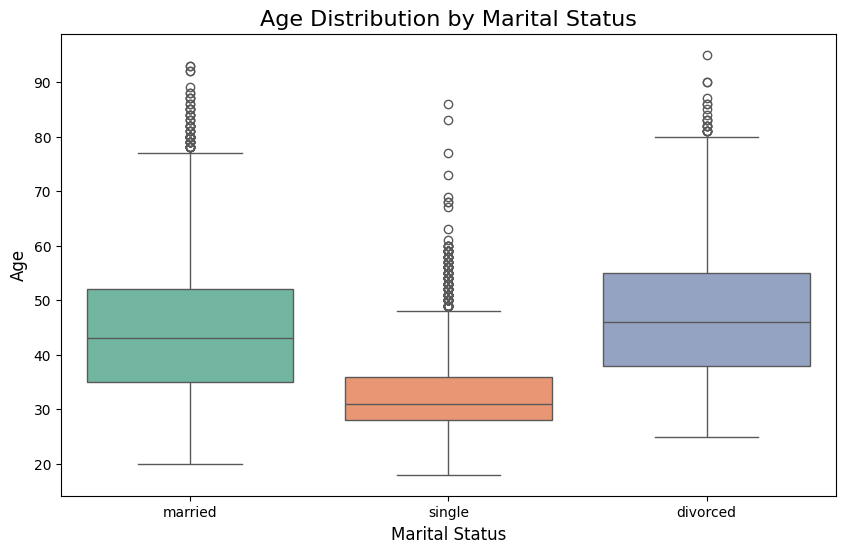

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ boxplot của age theo marital
sns.boxplot(data=df, x="marital", y="age", palette="Set2")

# Thêm tiêu đề và nhãn
plt.title('Age Distribution by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Hiển thị biểu đồ
plt.show()


Độ tuổi trung bình của những người đã kết hôn là 43 và đối với những người đã ly hôn là 46.
Độ tuổi trung bình của những người độc thân là 31

#### Campaign

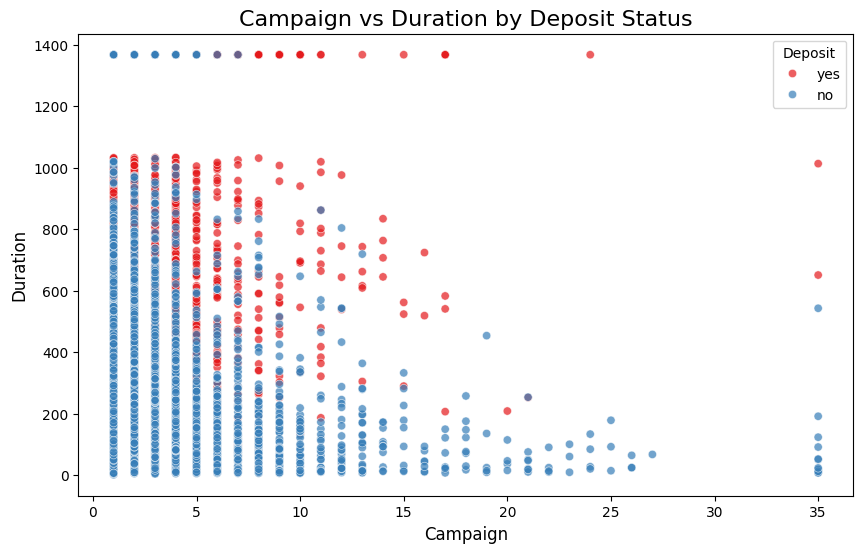

In [ ]:
### Campaign vs Duration Call

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ scatter plot
sns.scatterplot(data=df, x="campaign", y="duration", hue="deposit", palette="Set1", alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title('Campaign vs Duration by Deposit Status', fontsize=16)
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.legend(title="Deposit", loc="upper right")

# Hiển thị biểu đồ
plt.show()


In [ ]:
df1 = df[df['duration'] > 2000]
df1['duration'].value_counts().sort_index()

duration
2015    1
2016    2
2027    1
2028    1
2029    1
2053    1
2062    1
2078    1
2087    1
2093    1
2184    1
2231    1
2301    1
2330    1
2372    1
2420    1
2453    1
2456    1
2516    1
2621    1
2653    1
2692    1
2769    1
2770    1
2775    1
3076    1
3094    1
3102    1
3183    1
3253    1
3284    1
3881    1
Name: count, dtype: int64

+ Số lần gọi khách hàng trong chiến dịch càng nhiều thì thời gian của các cuộc gọi đó càng giảm đi
+ Thời gian gọi khách hàng càng cao thì càng dễ mời được khách hnagf đồng ý đăng kí 
+ Khi nào số cuộc gọi lên tới 18 cuộc thì khả năng thành công rất rất ít
+ Có nhiều khách hàng tiềm năng tích cực trong những ngày đầu của chiến dịch

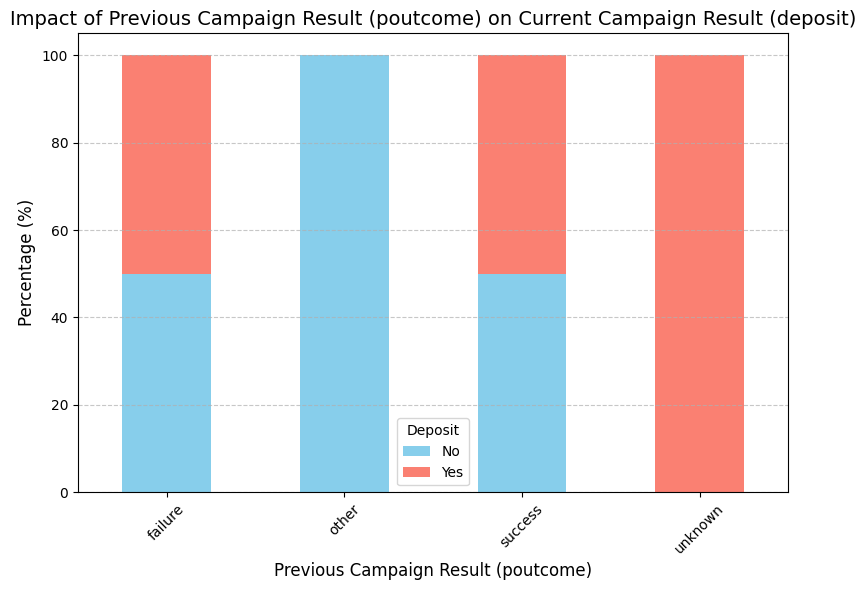

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử đây là dữ liệu của bạn
data = {
    'poutcome': ['success', 'failure', 'unknown', 'other', 'success', 'failure', 'unknown'],
    'deposit': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes']
}
df = pd.DataFrame(data)

# Bước 1: Tính tỷ lệ
pivot = df.groupby(['poutcome', 'deposit']).size().unstack(fill_value=0)
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Bước 2: Vẽ biểu đồ
pivot_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])

# Thêm thông tin vào biểu đồ
plt.title('Impact of Previous Campaign Result (poutcome) on Current Campaign Result (deposit)', fontsize=14)
plt.xlabel('Previous Campaign Result (poutcome)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Deposit', labels=['No', 'Yes'], fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


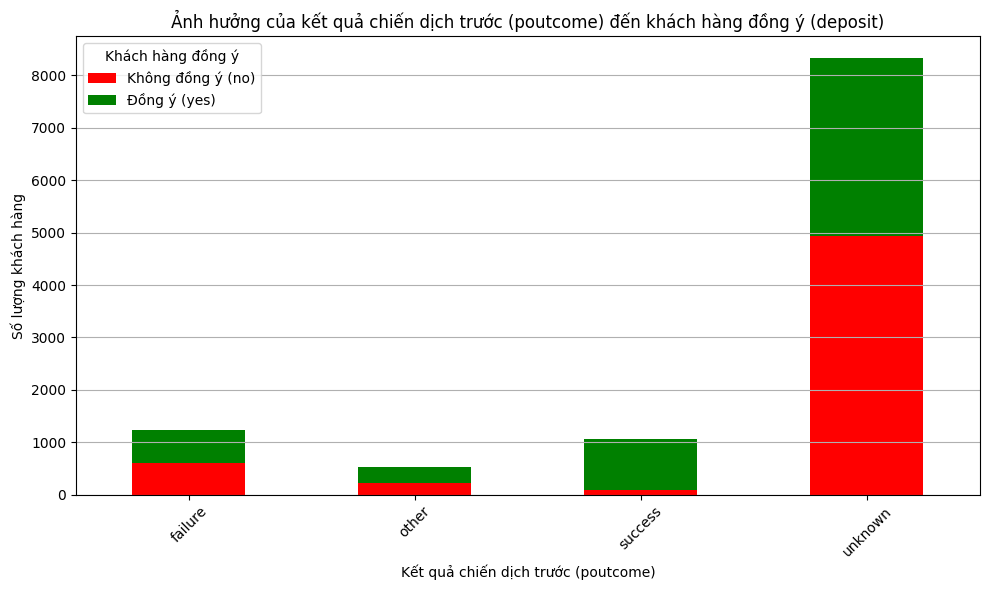

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
data = pd.read_csv('bank.csv')

# Tính toán số lượng khách hàng đồng ý và không đồng ý theo poutcome
summary = data.groupby(['poutcome', 'deposit']).size().unstack(fill_value=0)

# Vẽ biểu đồ cột chồng
summary.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))

# Thêm tiêu đề và nhãn
plt.title('Ảnh hưởng của kết quả chiến dịch trước (poutcome) đến khách hàng đồng ý (deposit)')
plt.xlabel('Kết quả chiến dịch trước (poutcome)')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.legend(title='Khách hàng đồng ý', labels=['Không đồng ý (no)', 'Đồng ý (yes)'])
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

<BarContainer object of 11162 artists>

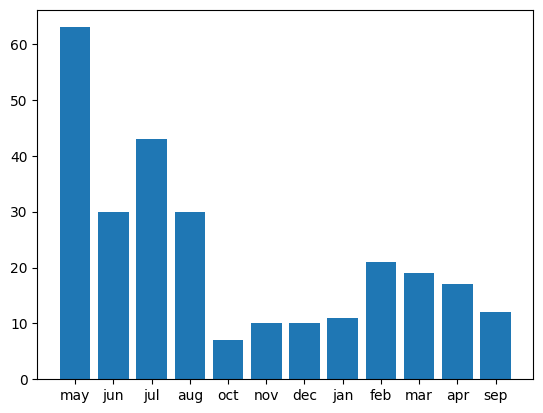

In [ ]:
## Campaign vs Month
plt.bar(df['month'], df['campaign'])


+ Chúng ta có thể thấy chiến dịch chủ yếu tập trung vào thời điểm bắt đầu kỳ ngân hàng (tháng 5, tháng 6 và tháng 7)
+ Thông thường, thời gian học tập bắt đầu vào thời điểm đó nên có khả năng cha mẹ sẽ gửi tiền dưới tên con mình
+ Họ cũng đã thực hiện chiến dịch của mình vào cuối kỳ ngân hàng.

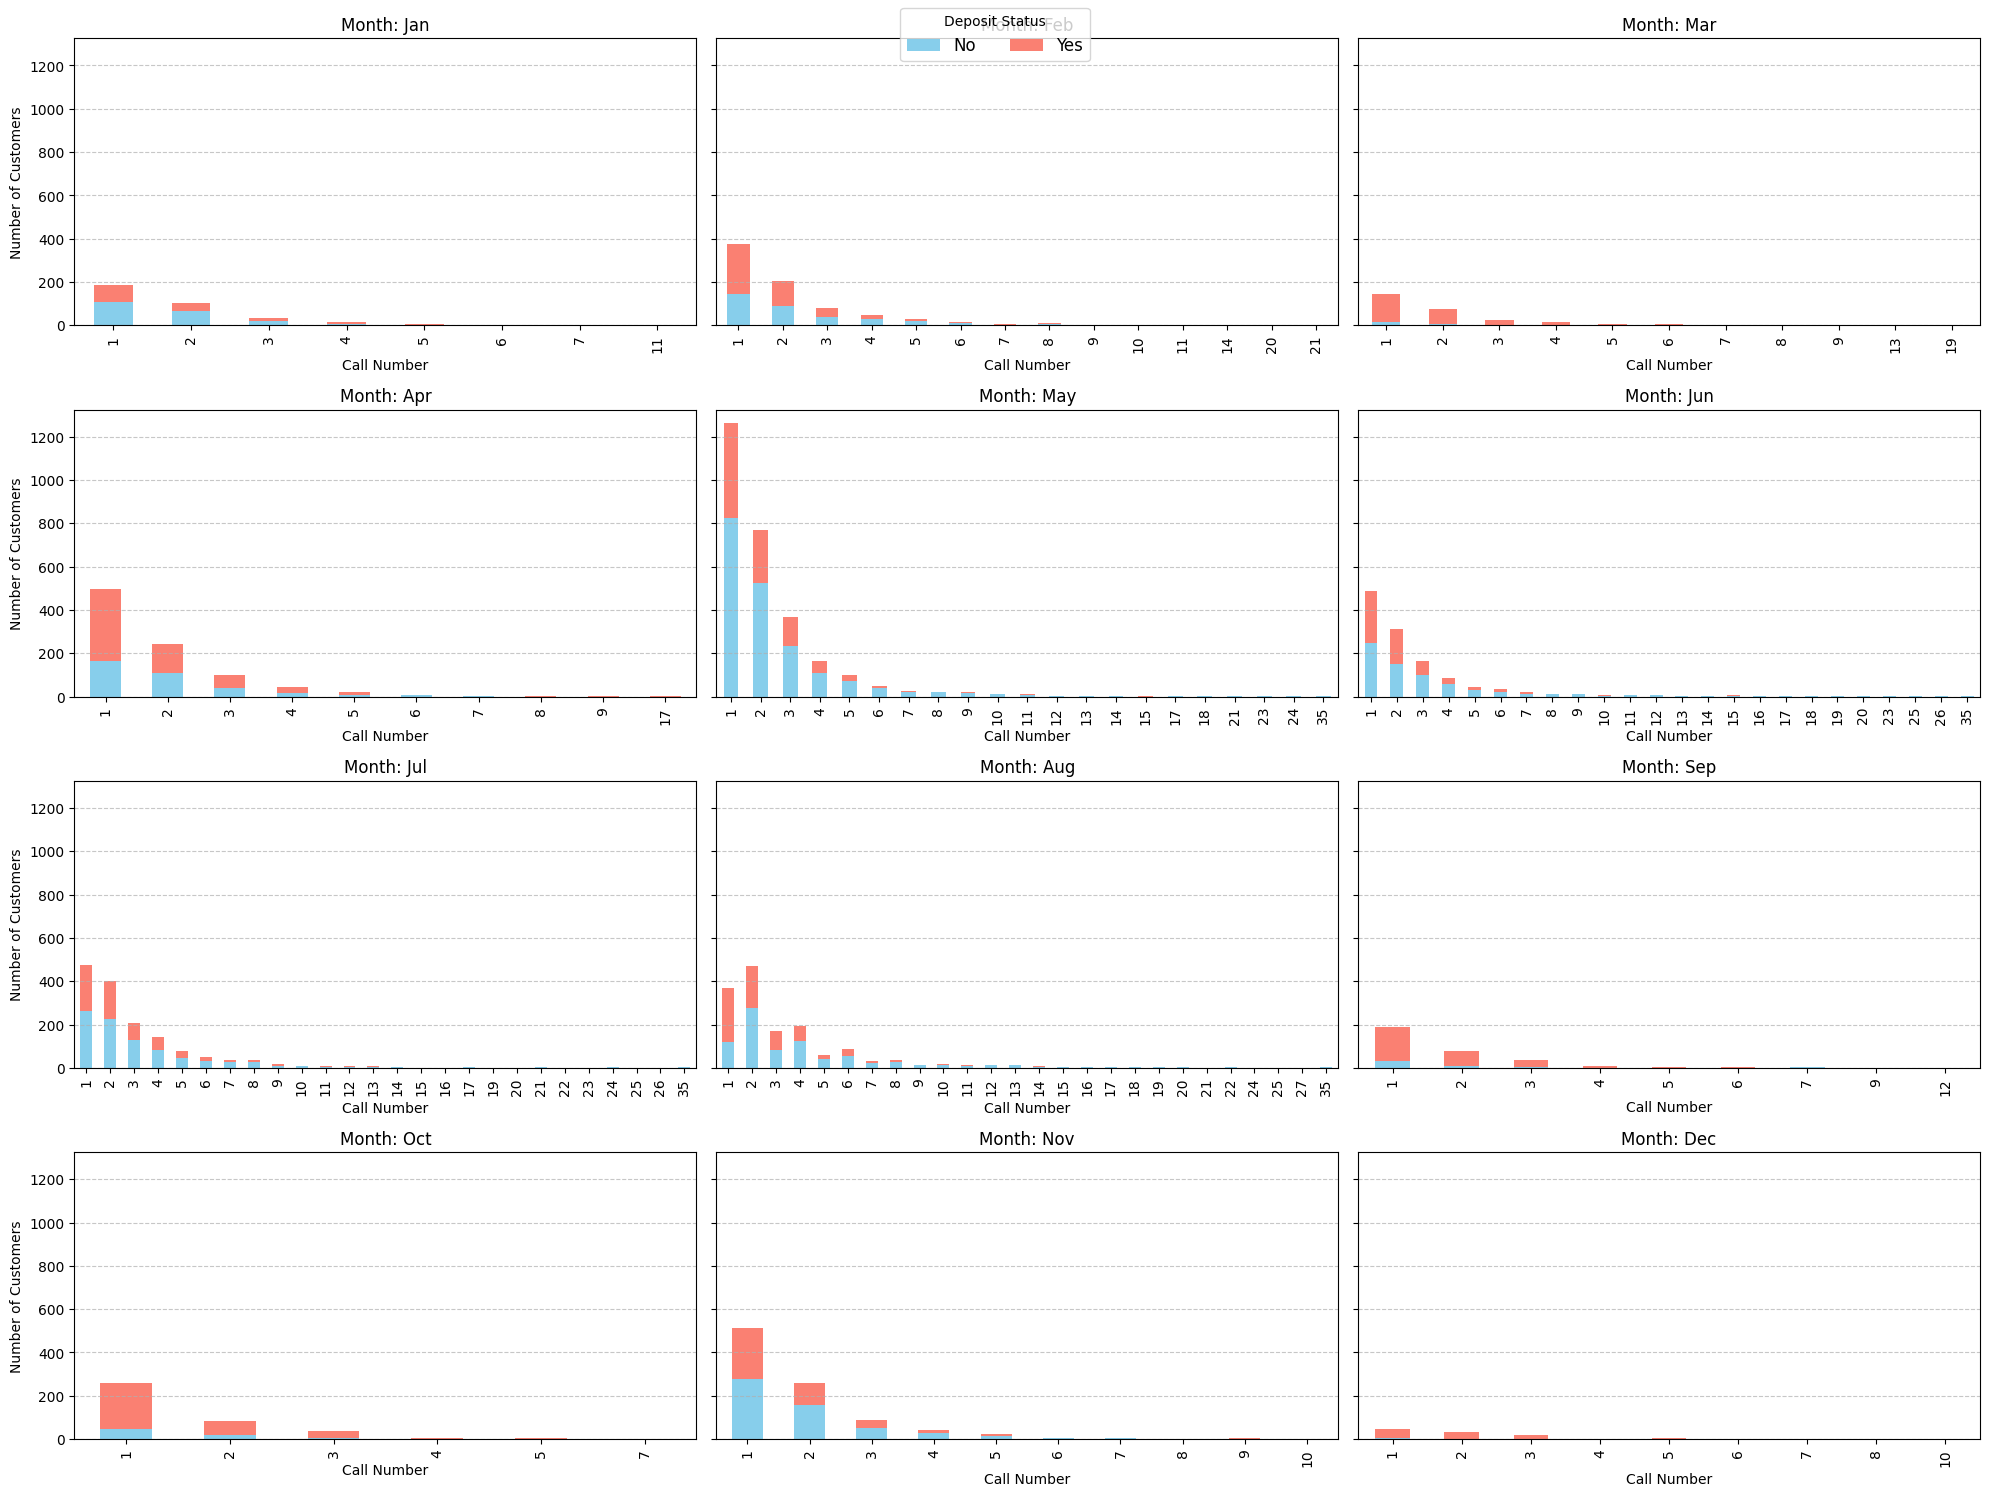

In [ ]:
# Step 1: Define the order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Step 2: Create a subplot for each month
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15), sharey=True)  # 4 hàng, 3 cột
axes = axes.flatten()  # Chuyển các axes thành mảng 1 chiều để dễ truy cập

# Step 3: Loop through each month in the defined order and plot
for i, month in enumerate(month_order):
    # Filter data for the current month
    month_data = df[df['month'] == month]
    
    # Group by 'campaign' and 'deposit'
    call_counts = month_data.groupby(['campaign', 'deposit']).size().unstack(fill_value=0)
    
    # Plot for the current month
    call_counts.plot(
        kind='bar', 
        stacked=True, 
        ax=axes[i], 
        color=['skyblue', 'salmon'], 
        legend=False
    )
    
    # Add title and axis labels for each subplot
    axes[i].set_title(f'Month: {month.capitalize()}', fontsize=12)
    axes[i].set_xlabel('Call Number', fontsize=10)
    axes[i].set_ylabel('Number of Customers', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Step 4: Adjust layout and add a global legend
fig.tight_layout()
fig.legend(['No', 'Yes'], loc='upper center', ncol=2, fontsize=12, title='Deposit Status')

# Show the plot
plt.show()


Nhận xét: 
+ Như ở phía trước ta đã phân tích, số cuộc gọi lên tới 18 cuộc thì khả năng thành công rất rất ít, tỷ lệ đó là 


In [ ]:
# Lọc dữ liệu với campaign >= 18 và deposit = 'no'
rejected_customers = df[(df['campaign'] >= 18) & (df['deposit'] == 'no')]

# Đếm số lượng khách hàng từ chối
num_rejected = rejected_customers.shape[0]

# Lọc tất cả khách hàng có campaign >= 18
total_customers = df[df['campaign'] >= 18].shape[0]

# Tính tỷ lệ phần trăm
rejection_percentage = (num_rejected / total_customers) * 100

print(f"Tỷ lệ phần trăm khách hàng từ chối khi campaign >= 18: {rejection_percentage:.2f}%")


Tỷ lệ phần trăm khách hàng từ chối khi campaign >= 18: 91.67%


In [ ]:
# Step 1: Filter data for calls 1, 2, and 3
filtered_data = df[df['campaign'].isin([1, 2, 3,4,5])]

# Step 2: Group data by month, campaign, and deposit status
grouped_data = (
    filtered_data
    .groupby(['month', 'campaign', 'deposit'])
    .size()
    .unstack(fill_value=0)  # Pivot the 'yes' and 'no' columns
    .reset_index()
)

# Step 3: Calculate success rate
grouped_data['total'] = grouped_data['no'] + grouped_data['yes']
grouped_data['success_rate'] = (grouped_data['yes'] / grouped_data['total']) * 100

# Step 4: Find the month with the highest success rate for each call number
result = grouped_data.loc[grouped_data.groupby('campaign')['success_rate'].idxmax()]

# Display the result
print(result[['campaign', 'month', 'success_rate']])


deposit  campaign month  success_rate
10              1   dec     91.111111
11              2   dec     93.939394
12              3   dec     95.238095
13              4   dec    100.000000
59              5   sep    100.000000


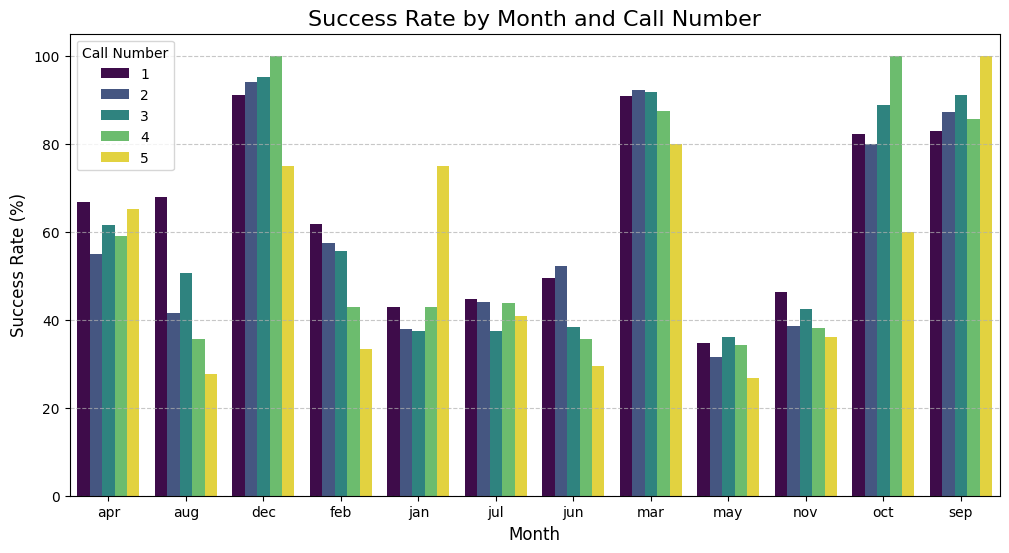

In [ ]:
# Step 5: Plotting the success rates for each call number
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='month', y='success_rate', hue='campaign', palette='viridis')
plt.title('Success Rate by Month and Call Number', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.legend(title='Call Number')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\3713557535.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




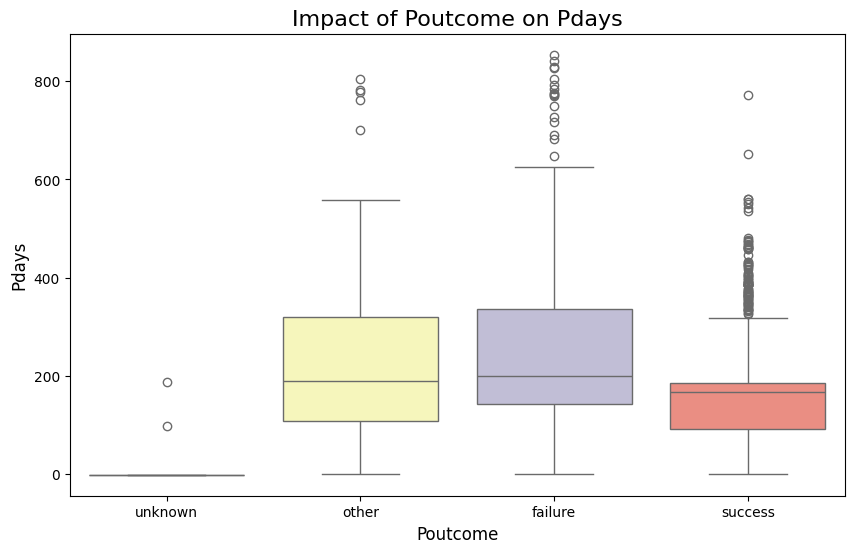

In [ ]:
plt.figure(figsize=(10, 6))

# Vẽ boxplot của pdays theo poutcome
sns.boxplot(data=df, x="poutcome", y="pdays", palette="Set3")

# Thêm tiêu đề và nhãn
plt.title('Impact of Poutcome on Pdays', fontsize=16)
plt.xlabel('Poutcome', fontsize=12)
plt.ylabel('Pdays', fontsize=12)

# Hiển thị biểu đồ
plt.show()


+ Có thể thấy kết quả của chiến dịch trước đó càng về cuối thì thu hút được nhiều khách hàng đăng kí hơn là trước
+ Số ngày trung bình trôi qua sau khi liên hệ với khách hàng để biết kết quả chiến dịch trước đó không thành công là 200 ngày.
+ Số ngày trung bình trôi qua sau khi liên hệ với khách hàng để biết kết quả chiến dịch trước đó thành công là 168 ngày

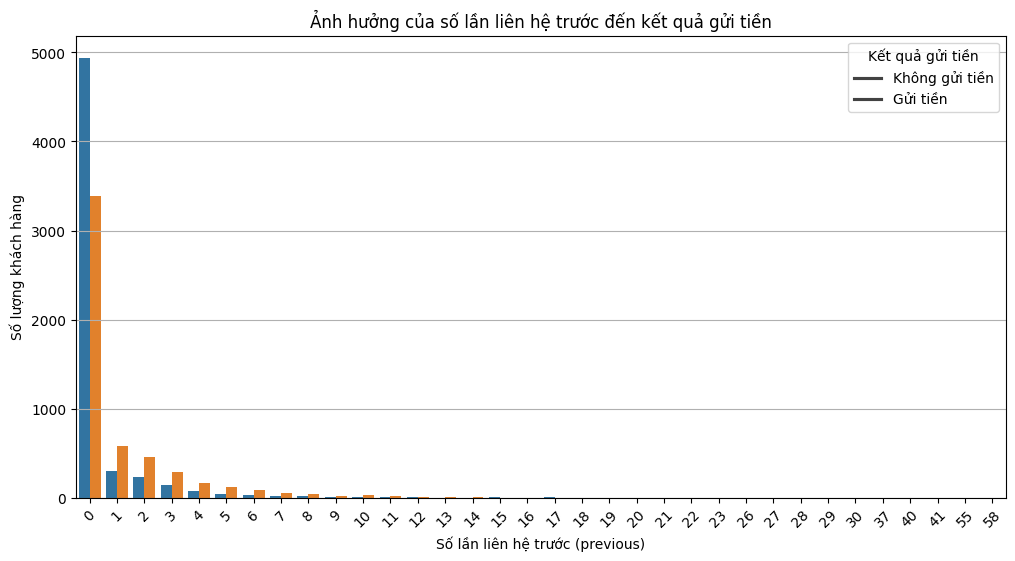

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('bank.csv')  # Thay 'bank.csv' bằng đường dẫn đến file của bạn

# Tạo một DataFrame mới với số lượng deposit cho mỗi giá trị của previous
summary_df = df.groupby(['previous', 'deposit']).size().reset_index(name='count')

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x='previous', y='count', hue='deposit', data=summary_df)
plt.title('Ảnh hưởng của số lần liên hệ trước đến kết quả gửi tiền')
plt.xlabel('Số lần liên hệ trước (previous)')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Kết quả gửi tiền', loc='upper right', labels=['Không gửi tiền', 'Gửi tiền'])
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.grid(axis='y')
plt.show()

In [ ]:
df['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

In [ ]:
df.shape

(11162, 17)

# Encoder

In [ ]:
df1 =df.copy()

In [ ]:
le = LabelEncoder()
df1.marital = le.fit_transform(df1.marital)
df1.housing = le.fit_transform(df1.housing)
df1.deposit = le.fit_transform(df1.deposit)
df1.loan = le.fit_transform(df1.loan)
df1.default = le.fit_transform(df1.default)
label_columns = ['job', 'education', 'month', 'contact', 'poutcome']
for col in label_columns:
    df1[col] = le.fit_transform(df1[col])

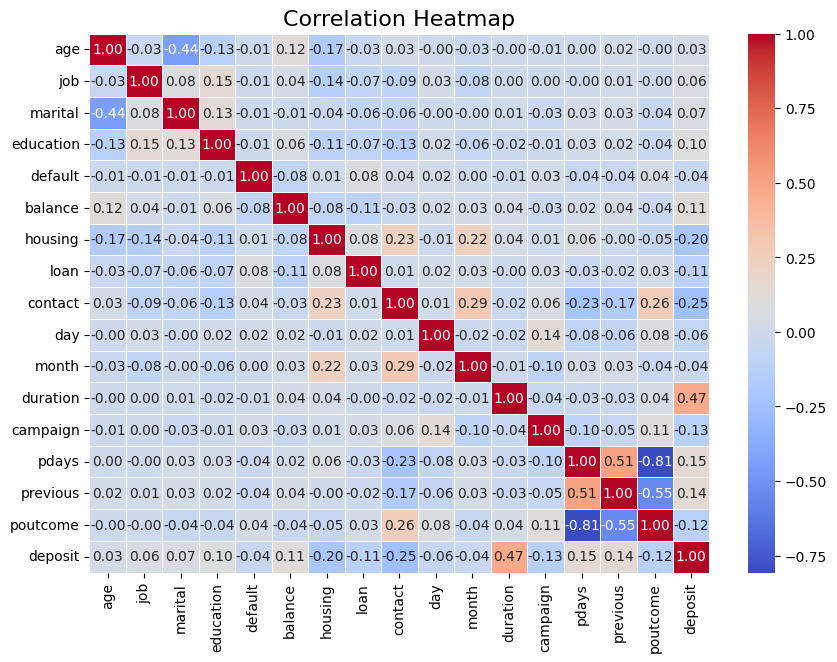

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix = df1.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 7))  # Kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Cài đặt tiêu đề
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#### Label Encoder

In [ ]:
le = LabelEncoder()
df.marital = le.fit_transform(df.marital)
df.housing = le.fit_transform(df.housing)
df.deposit = le.fit_transform(df.deposit)
df.loan = le.fit_transform(df.loan)
df.default = le.fit_transform(df.default)


#### One-hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_cat_list = ['job', 'education', 'month', 'contact', 'poutcome']

encoder = OneHotEncoder(sparse_output=False)

X = df[ohe_cat_list]

ohe_result = encoder.fit_transform(X)

# Chuyển đổi kết quả thành DataFrame với tên cột phù hợp
ohe_df = pd.DataFrame(ohe_result, columns=encoder.get_feature_names_out(ohe_cat_list))

df = pd.concat([df, ohe_df], axis=1)
df 

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,1,secondary,0,2343,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56,admin.,1,secondary,0,45,0,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41,technician,1,secondary,0,1270,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55,services,1,secondary,0,2476,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54,admin.,1,tertiary,0,184,0,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,2,primary,0,1,1,0,cellular,20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,services,1,secondary,0,733,0,0,unknown,16,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32,technician,2,secondary,0,29,0,0,cellular,19,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,technician,1,secondary,0,0,0,1,cellular,8,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Xóa các cột gốc sau khi one-hot encoding
df = df.drop(columns=ohe_cat_list)


In [ ]:
df

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343,1,0,5,1367,1,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56,1,0,45,0,0,5,1367,1,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41,1,0,1270,1,0,5,1367,1,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55,1,0,2476,1,0,5,579,1,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54,1,0,184,0,0,5,673,2,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,0,1,1,0,20,257,1,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,1,0,733,0,0,16,83,4,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32,2,0,29,0,0,19,156,2,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,1,0,0,0,1,8,9,2,172,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Modeling

Sử dụng kĩ thuật học máy: Random Forest để chọn ra những thuộc tính quan trọng

In [ ]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành biến độc lập (X) và biến phụ thuộc (y)
X = df1.drop('deposit', axis=1)
y = df1['deposit']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Lấy ra độ quan trọng của các feature
importances = model.feature_importances_

# Tạo DataFrame để hiển thị độ quan trọng
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nĐộ quan trọng của các feature:")
print(feature_importance_df)


Độ quan trọng của các feature:
      Feature  Importance
11   duration    0.375221
10      month    0.084008
5     balance    0.082802
0         age    0.082631
9         day    0.072412
13      pdays    0.045017
8     contact    0.044094
1         job    0.038082
15   poutcome    0.035311
12   campaign    0.034739
6     housing    0.029570
14   previous    0.023597
3   education    0.023015
2     marital    0.018250
7        loan    0.010024
4     default    0.001225


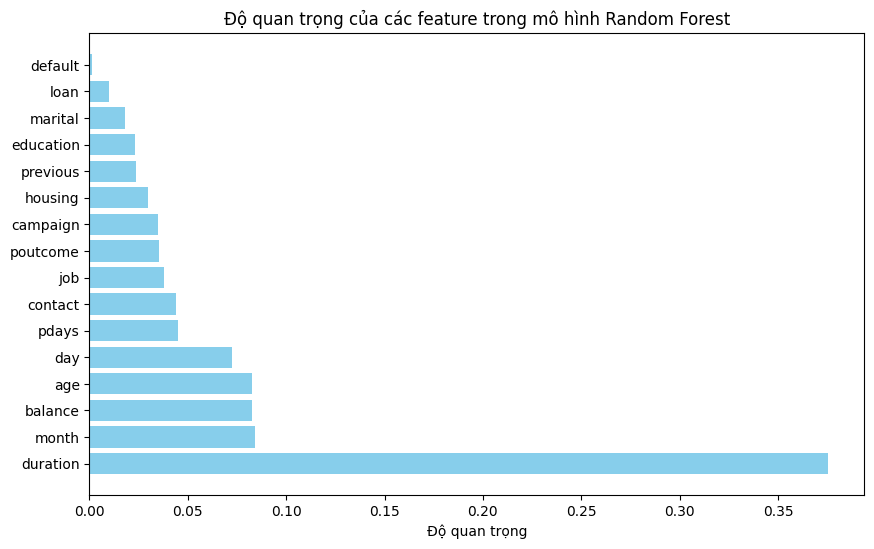

In [ ]:

# Vẽ biểu đồ độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Độ quan trọng')
plt.title('Độ quan trọng của các feature trong mô hình Random Forest')
plt.show()

# Đánh giá kết quả chiến dịch sau khi thực hiện đề xuất

#### Thay đổi khách hàng mục tiêu:
1. Sinh viên (<30 tuổi), Người về hưu (>60 tuổi)
2. Nhóm khách hàng từ 30-50 tuổi, có trình độ học vấn trên secondary, số dư trung bình cao hơn 1804, không có nợ

In [ ]:
df_yes = df[df['deposit'] == 'yes']
average_balance_yes = df_yes['balance'].mean()

print(f"Số dư tài khoản trung bình của những khách hàng say 'yes': {average_balance_yes}")

Số dư tài khoản trung bình của những khách hàng say 'yes': 1804.2679145396105


In [ ]:
filtered_data = df[
    (df['job'] == 'student') | (df['job'] == 'retired') | 
    ((((df['age'] >= 30) & (df['age'] <= 50) & (df['education'] >= 'secondary'))) & 
    (df['balance'] > 1804) & 
    (df['loan'] == 'no') &(df['default'] == 'no') & (df['housing'] == 'no'))
]
registration_rate = filtered_data['deposit'].value_counts(normalize=True).get('yes', 0)

print(f"Tỷ lệ đăng ký: {registration_rate:.2%}")


Tỷ lệ đăng ký: 67.60%


### Thiết kế lại kịch bản cuộc gọi
1.Tần suất gọi thuyết phục trong 7 lần đầu tiên
 
2.Nâng cao thời lượng cuộc gọi trên mức trung bình để 1 cuộc gọi thành công là 537 giây 

In [ ]:
old_customers = df[df['poutcome'] == 'failure']

success_rate_old_customers = old_customers['deposit'].value_counts(normalize=True).get('yes', 0)

print(f"Tỷ lệ đăng ký thành công của khách hàng cũ: {success_rate_old_customers:.2%}")


Tỷ lệ đăng ký thành công của khách hàng cũ: 50.33%


In [ ]:
filtered_data = df[(df['poutcome'] == 'failure') & 
                     (df['duration'] > 537) & 
                     (df['campaign'] >= 1) & 
                     (df['campaign'] <= 7)]

# Tính tỷ lệ thành công (đã đăng ký)
success_rate_filtered = filtered_data['deposit'].value_counts(normalize=True).get('yes', 0)

print(f"Tỷ lệ đăng ký thành công của khách hàng cũ (failure) khi thời gian cuộc gọi > 537 và campaign trong khoảng 1-7: {success_rate_filtered:.2%}")


Tỷ lệ đăng ký thành công của khách hàng cũ (failure) khi thời gian cuộc gọi > 537 và campaign trong khoảng 1-7: 81.39%
